# Исследование объявлений о продаже квартир

#### Тема проекта:
- Провести исследовательский анализ данных для объявлений о продаже квартир 

#### Цель:
- Изучить основные характеристики и ответить на исследовательские вопросы

#### Поставленные задачи:
- Сделать предобработку данных;
- Произвести расчёты и добавить в таблицу информацию:
 - Цена за квадратный метр;
 - День недели, месяц, год публикации объявления;
 - Категоризация этажей: первый, последний, другой;
 - Соотношение жилой и общей площади, площади кухни и общей площади.
- Исследовать особенности некоторых параметров:
 - Распределение значений: площадь, цена, число комнат, высота потолков;
 - Время продажи квартиры;
 - Зависимость цены от выбранных параметров: площадь, число комнат, расстояние до центра, этаж, время продажи.
- Рассчитать и сравнить среднюю цену квадратного метра в топ-10 населённых пунктах;
- Выделить центральную область в Санкт-Петербурге;
- Произвести сравнение центрального и нецентрального сегмента квартир.

#### Краткий план работы:
- Шаг 1. Открытие и изучение файла
- Шаг 2. Предобработка и подготовка данных
- Шаг 3. Расчёт показателей
- Шаг 4. Проведение исследовательского анализа данных:
 - 4.1. Распределение параметров: площадь, цена, число комнат, высота потолков
 - 4.2. Изучение времени продажи квартиры
 - 4.3. Изучение зависимости цены от выбранных параметров
- Шаг 5. Изучение средней цены квадратного метра в топ-10 населённых пунктах
- Шаг 6. Выделение центральной области в Санкт-Петербурге
- Шаг 7. Сравнение центрального и нецентрального сегмента квартир

#### Вывод:
- Произведены необходимые расчёты;
- Рассмотрены все исследовательские вопросы;
- Отмечены интересные особенности и закономерности.

**Статус проекта**: проект завершён.

**Используемые библиотеки**: *numpy*, *pandas*, *matplotlib*

**Источник данных**: [курс Data Science от Яндекс.Практикум](https://praktikum.yandex.ru/profile/data-scientist/)

In [1]:
# отключение предупреждений
import warnings
warnings.filterwarnings('ignore') 

# импорт библиотек и функций для дальнейшей работы
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Шаг 1. Открытие и изучение файла

Выгрузим файл в датафрейм и посмотрим общую информацию:

In [2]:
# загрузка файла, разделитель sep='\t'
estate_raw = pd.read_csv('datasets/real_estate_data.csv', sep='\t', parse_dates=['first_day_exposition'])
estate_raw.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# просмотр общей информации
print(estate_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

- **Размер**. В таблице **23699 строк** (количество объявлений) и **22 колонки** (характеристики объявлений).

- **Пропуски**. В некоторых колонках есть пропущенные значения. Далее мы детельно рассмотрим пропуски и примем решение, как их обработать.

- **Типы данных**
 - Колонка *is_apartment* - вместо boolean тип object. Также очень мало самих значений (не пропусков).
 - Колонки с типом данных float, хотя по смыслу больше подходит integer. Необходимо убедиться, что среди значений нет дробных чисел. Наименования колонок:
   - *floors_total* (всего этажей в доме)
   - *balcony* (число балконов)
   - *ponds_around3000* (число водоёмов в радиусе 3 км)
   - *parks_around3000* (число парков в радиусе 3 км)
   - *days_exposition* (сколько дней было размещено объявление)

Проверим **названия колонок**:

In [4]:
print(estate_raw.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


Мы убедились, что с названиями колонок нет проблем, лишних пробелов не обнаружено.  
Ради полного единообразия можно было бы переименовать *cityCenters_nearest* в *city_сenters_nearest*, но это не критично.

In [5]:
# обзор пропусков в каждой колонке
estate_raw.isnull().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

Большинство колонок содержит **пропуски**, причем в некоторых случаях доля пропусков может быть **более 50%**.  
Известно, что некоторые данные получены **автоматически на основе картографических данных**.  
В их число входят:
- *cityCenters_nearest* - расстояние до центра
- *airports_nearest* - расстояние до аэропорта
- *parks_nearest* - расстояние до ближайшего парка
- *ponds_nearest* - расстояние до ближайшего водоема
- *parks_around3000* - число парков в радиусе 3 км
- *ponds_around3000* - число водоёмов в радиусе 3 км

В этих колонках очень **много пропусков**. Если колонки определяются автоматически, это значит, что программа **не определила расстояние до объектов**. Это дополнительная задача для коллег, занимающихся вопросом геолокации.

В реальной жизни мы могли бы попросить перевыгрузить данные. В данном случае будем работать с тем, что есть. С каждой из этих колонок будем разбираться отдельно в шаге по **обработке пропусков**.

In [6]:
# проверка явных дубликатов
estate_raw.duplicated().sum()

0

Явных дубликатов не обнаружено, но в идеале данные необходимо дополнительно проверить с **учётом регистра**.  
Это можно сделать на этапе предобработки после приведения колонки к нужному типу.

## Шаг 1. Вывод

- Файл содержит **23699 строки**, т.е. данные по 23699 объявлениям, и **22 колонки** с характеристиками квартиры.

- В некоторых колонках необходимо изменить **тип данных**:
 - Колонка *is_apartment* (булев тип) необходимо изменить с **object** на **boolean**.
 - Была выделена **группа колонок** со схожей проблемой: тип данных **float**, хотя по смыслу больше подошел бы **integer**.   
 Но все эти колонки содержат **пропуски** - в этом может быть причина типа данных **float**. С другой стороны, проблема может быть и в **дробных числах** - это необходимо будет проверить.

- Была обнаружена проблема, что в колонках с **расстоянием до объектов** много пропусков. Это говорит о том, что по какой-то причине программа, определяющее расстояние, не отработала.
- **Большинство колонок** содержит **пропуски**, причем количество пропущенных значений может достигать **50% и более**.
- **Явных дубликатов** не обнаружено.

## Шаг 2. Предобработка данных

Основная задача состоит в следующем:

- Проверить значения колонок на реалистичность;
- Заменить **пропуски**, если это возможно и если это необходимо для будущих задач;
- Изменить **тип данных колонки** на более подходящий.

Данные будут рассмотрены последовательно по колонкам.

In [7]:
# создадим рабочую копию файла
estate = estate_raw.copy()
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Колонка is_apartment

In [8]:
# выведем количество пропусков
print('Количество пропусков в колонке "is_apartment":', estate.is_apartment.isnull().sum())

# значения колонки
print('Значения колонки:', estate.is_apartment.unique())

Количество пропусков в колонке "is_apartment": 20924
Значения колонки: [nan False True]


Колонка показывает, является ли продаваемый объект недвижимости **апартаментами**.  
В колонке есть только три значения: **True**, **False** и **пропуск**. Подавляющее большинство значений - это **пропуски**. 

Самая тривиальная причина, которой можно объяснить проблемы в данных - это **техническая или человеческая ошибка** (что-то было неправильно выгружено или случайно стёрто).  

Если же с данными всё в порядке, у пропуска может быть смысловая трактовка:  

1. Пропуски на самом деле явлются **False**. Люди указывают **True**, если недвижимость является **апартаментами**.  
Если же это НЕ апартаменты, в большинстве случаев они просто **игнорируют эту графу**, из-за чего возникают пропуски.


2. Возможно, люди считают несущественным указывать в объявлении, является ли квартира "апартаментами", поэтому просто **игнорируют эту графу**. На самом же деле пропуск **может быть как True, так и False**. Теоретически эти пропуски можно восстановить, например, по адресу, названию ЖК, году постройки и др. Или же связаться с владельцем для уточнения деталей.

В идеале этот вопрос нужно дополнительно проработать. Но будем придерживаться трактовки, что на самом деле пропуск - это **False**. Сделаем замену и изменим тип данных на boolean:

In [9]:
# замена пропусков на False
# изменение типа данных на bool
estate['is_apartment'] = estate['is_apartment'].fillna(False).astype('bool')

# проверка изменений
print(estate['is_apartment'].dtype)
print(estate['is_apartment'].value_counts(dropna=False))

bool
False    23649
True        50
Name: is_apartment, dtype: int64


Замена произведена успешно, **пропуски** были заменены на **False**, значения не потерялись.

#### Колонки parks_around3000 и ponds_around3000

In [10]:
# выведем количество пропусков
print('Количество пропусков в колонке "parks_around3000":', estate.parks_around3000.isnull().sum())
print('Количество пропусков в колонке "ponds_around3000":', estate.ponds_around3000.isnull().sum())

Количество пропусков в колонке "parks_around3000": 5518
Количество пропусков в колонке "ponds_around3000": 5518


Как мы определили выше, информация по этим колонкам, скорее всего, пропущена по **техническим причинам** (не определено местоположение).  
Замечаем, что в этих колонках количество пропусков **одинаково**. Есть подозрение, что это одни и те же строки.  
Проверим это, сравнив два среза с **пропусками**:

In [11]:
estate[estate['parks_around3000'].isnull()].equals(estate[estate['ponds_around3000'].isnull()])

True

Да, это два идентичных среза. В этих срезах в принципе **отсутствует** информация по каким-либо **расстояниям**, в т. ч. до аэропорта, центра:

In [12]:
# срез с пропусками в парке/водоеме в радиусе 3 км
all_distance_null = estate[estate['parks_around3000'].isnull()]

# проверка по колонкам
for col_name in ['parks_nearest', 'ponds_nearest', 'airports_nearest', 'cityCenters_nearest']:
    print(f'Количество строк без пропусков в {col_name}:', end=' ')
    print(len(all_distance_null[all_distance_null[col_name].notnull()]))

Количество строк без пропусков в parks_nearest: 0
Количество строк без пропусков в ponds_nearest: 0
Количество строк без пропусков в airports_nearest: 0
Количество строк без пропусков в cityCenters_nearest: 0


Да, в срезе **нет данных по расстояниям**. То что пропуски содержатся в одних и тех же строках - сигнал для дополнительной проверки работы программы по определению местоположения.

Поскольку для текущей задачи эта информация не потребуется, можем оставить данные без изменений.  
Дополнительно проверим, чтобы в колонке не было дробных чисел:

In [13]:
# проверка данных по паркам
print('Проверка данных по паркам:')
print(estate.parks_around3000.value_counts(dropna=False))

print()

# проверка данных по водоемам
print('Проверка данных по водоемам:')
print(estate.ponds_around3000.value_counts(dropna=False))

Проверка данных по паркам:
0.0    10106
1.0     5681
NaN     5518
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Проверка данных по водоемам:
0.0    9071
1.0    5717
NaN    5518
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64


Всё в порядке, все значения - **целые числа**. Кроме того, они выглядят правдоподобно: рядом с домом может быть до 3 парков и водоемов.  
Ради соблюдения формата можем перевести из в **Int64**, которые обозначает целые числа и умеет работать с пропусками:

In [14]:
# изменение типа данных на Int64
estate['parks_around3000'] = estate['parks_around3000'].astype('Int64')
estate['ponds_around3000'] = estate['ponds_around3000'].astype('Int64')

# проверка типа данных
estate[['parks_around3000', 'ponds_around3000']].dtypes

parks_around3000    Int64
ponds_around3000    Int64
dtype: object

#### Колонки parks_nearest и ponds_nearest

Поскольку пропусков в этих колонках гораздо больше, чем в *parks_around3000* и *ponds_around3000*, посмотрим, какие значения **парк / пруд 3000** соответствуют **пропускам** в рассматриваемых колонках:

In [15]:
# проверка данных по паркам
print('Проверка данных по паркам:')
estate[estate['parks_nearest'].isnull()]
print(estate[estate['parks_nearest'].isnull()].parks_around3000.value_counts(dropna=False))

Проверка данных по паркам:
0      10102
NaN     5518
Name: parks_around3000, dtype: Int64


Это означает, что пропуску соответствует два варианта:
- **Значение 0** - возможно, это означает, что ближайшие парки находятся в **радиусе более 3 км** от дома. Но расстояние до них не определилось.  
- **Значение NaN** - расстояние и количество парков **вообще не определилось** - те самые 5518 значений, с которыми мы уже сталкивались.

Выведем **максимальное расстояние**, которое было определено, и для наглядности посмотрим распределение на гистограмме:

In [16]:
# топ-10 значений по max расстоянию
estate[estate['parks_nearest'].notnull()].parks_nearest.sort_values(ascending=False).head(10)

19430    3190.0
10959    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64

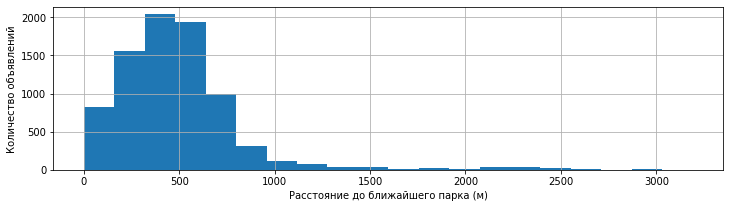

In [17]:
# распределение расстояний на гистограмме
estate[estate['parks_nearest'].notnull()].parks_nearest.plot(kind='hist', bins=20, figsize=(12, 3), grid=True)

plt.xlabel('Расстояние до ближайшего парка (м)')
plt.ylabel('Количество объявлений')
plt.show()

Большинство определившихся значений находятся **в пределах 1 км**. Значения **больше 3,2 км отсутствуют**.  
Возможно, значения больше 3,2 км не смогли определиться автоматически, поэтому мы получили много **пропусков**.

Проверим аналогичную информацию по **водоемам**:

In [18]:
# проверка данных по водоемам
print('Проверка данных по водоемам:')
print(estate[estate['ponds_nearest'].isnull()].ponds_around3000.value_counts(dropna=False))

Проверка данных по водоемам:
0      9071
NaN    5518
Name: ponds_around3000, dtype: Int64


Аналогичная ситуация: либо **0 водоемов** и отсутствие точного расстояния, либо **пропуск**.  
Посмотрим максимальное расстояние и гистограмму:

In [19]:
# топ-10 значений по max расстоянию
estate[estate['ponds_nearest'].notnull()].ponds_nearest.sort_values(ascending=False).head(10)

20726    1344.0
19924    1341.0
19138    1341.0
1476     1337.0
12054    1313.0
18396    1299.0
21454    1293.0
14927    1278.0
20509    1278.0
4122     1275.0
Name: ponds_nearest, dtype: float64

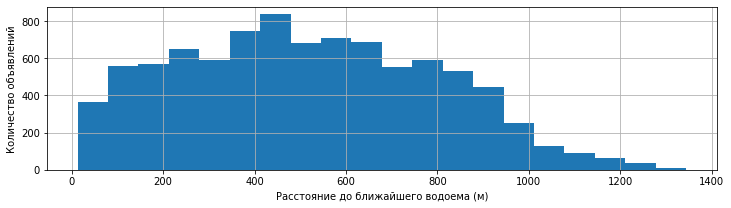

In [20]:
# распределение расстояний на гистограмме
estate[estate['ponds_nearest'].notnull()].ponds_nearest.plot(kind='hist', bins=20, figsize=(12, 3), grid=True)

plt.xlabel('Расстояние до ближайшего водоема (м)')
plt.ylabel('Количество объявлений')
plt.show()

Здесь нет таких ярков выраженных пиков, как в парках. Но значения **больше 1,3 км отсутствуют**. 

Может быть проблема в том, что это расстояние для **небольших населенных пунктов**, где есть сложность в определении ближайшего парка или водоема? Посчитаем количество пропусков в парках и прудах по локациям:

In [21]:
# топ-10 пропусков в парках
print('Топ-10 пропусков в парках:')
print(estate[estate['parks_nearest'].isnull()]['locality_name'].value_counts(dropna=False).head(10))

print()

# топ-10 пропусков в парках
print('Топ-10 пропусков в водоемах:')
print(estate[estate['ponds_nearest'].isnull()]['locality_name'].value_counts(dropna=False).head(10))

Топ-10 пропусков в парках:
Санкт-Петербург      8437
посёлок Мурино        522
посёлок Шушары        440
Всеволожск            398
посёлок Парголово     317
Гатчина               307
деревня Кудрово       299
Выборг                237
Колпино               205
Кудрово               173
Name: locality_name, dtype: int64

Топ-10 пропусков в водоемах:
Санкт-Петербург      7738
посёлок Мурино        522
Всеволожск            398
Гатчина               307
деревня Кудрово       299
посёлок Шушары        288
посёлок Парголово     271
Выборг                237
Пушкин                192
Кудрово               173
Name: locality_name, dtype: int64


Большинство значений приходится на **Санкт-Петербург** - это не маленькая локация, значит, предположение не подтвердилось.  

Итак, мы увидели закономерность, что для **пропусков** в парках и водоемах есть два варианта:
- либо объекты находятся в радиусе **более 3 км** от дома и точное расстояние не определилось
- либо расстояние и количество парков **вообще не определилось** (в обоих случаях 5518 значений, с которыми мы уже сталкивались)

Мы предположили, что, возможно, эта проблема присуща **небольшим неселенным пунктам**, но увидели, что большинство пропусков приходится на **Санкт-Петербург**.

О том, что при автоматическом определении расстояния много пропусков, нужно сообщить коллегам, составив баг-репорт.  
Можно продемонстрировать:
- идентичные срезы с одинаковым количеством пропусков в *ponds_around3000* и *parks_around3000* - **5518 значений**
- показать, что при сопоставлении **"...nearest" (с пропусками)** и  **"...3000"** встречается только два значения - либо 0, либо пропуск.  
То есть нет такого, что в радиусе 3 км есть парк, но расстояние до него отсутствует - это положительный момент.

Поскольку эти данные не потребуются для текущей задачи, мы, как и в предыдущем случае, оставим их без изменений.

#### Колонка balcony

In [22]:
# выведем количество пропусков в колонке
print('Количество пропусков в колонке "balcony":', estate.balcony.isnull().sum())

Количество пропусков в колонке "balcony": 11519


Пропуск можно объяснить следующим образом:
- В квартире **нет балкона**, поэтому в анкете стоит пропуск.
- Балкон **есть**, но графу забыли заполнить.

В данном случае будем считать, что балкон можно рассматривать как преимущество при продаже квартиры. Поэтому если информации по количеству нет, то, скорее всего, **пропуск** можно трактовать как **0**:

In [23]:
# замена в колонке balcony
# для сравнения выведем значения ДО
print('Результат ДО замены:')
print(estate['balcony'].value_counts(dropna=False))
print()

# замена пропусков на 0
estate['balcony'] = estate['balcony'].fillna(0)

# выведем значения ПОСЛЕ
print('Результат ПОСЛЕ замены:')
print(estate['balcony'].value_counts(dropna=False))

Результат ДО замены:
NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Результат ПОСЛЕ замены:
0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64


Замечаем, что есть **487 объявлений**, где в квартире **4 либо 5 балконов**, что кажется необычным.  
Проверим, возможно, это очень большие либо очень дорогие квартиры:

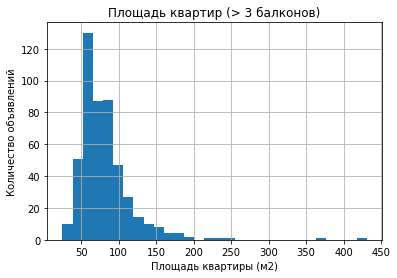

In [24]:
# проверка по total_area
estate.query('balcony > 3')['total_area'].hist(bins=30)

plt.title('Площадь квартир (> 3 балконов)')
plt.xlabel('Площадь квартиры (м2)')
plt.ylabel('Количество объявлений')
plt.show()

Большинство квартир имеют **стандартный метраж** - от 50 до 100 метров.

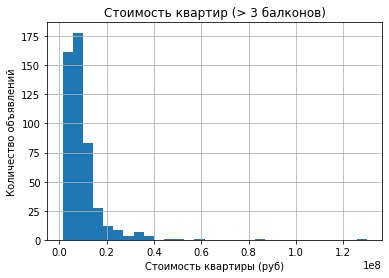

In [25]:
# проверка по last_price
estate.query('balcony > 3')['last_price'].hist(bins=30)

plt.title('Стоимость квартир (> 3 балконов)')
plt.xlabel('Стоимость квартиры (руб)')
plt.ylabel('Количество объявлений')
plt.show()

Цена для большинства таких квартир - **не более 20 млн рублей**. Тоже нельзя сказать, что это очень дорогие квартиры.

Ещё одна из версий, что в объявлениях **лоджии** и **эркеры** люди также классифицировали как балконы. Поэтому получилось такое нестандартное количество. Поскольку совсем выдающихся значений типа "100 балконов" нет, оставим данные в текущем виде.

Избавившись ранее от пропусков, приведем количество балконов к типу **integer**:

In [26]:
# изменение типа данных на int
estate['balcony'] = estate['balcony'].astype('int')

# проверка типа данных
estate['balcony'].dtype

dtype('int32')

In [27]:
# проверим ситуацию по пропускам
estate.isnull().sum().sort_values(ascending=False)

parks_nearest           15620
ponds_nearest           14589
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
studio                      0
floor                       0
is_apartment                0
open_plan                   0
balcony                     0
total_images                0
dtype: int64

#### Колонка locality_name

In [28]:
# выведем количество пропусков в колонке
print('Количество пропусков в колонке "locality_name":', estate.locality_name.isnull().sum())

Количество пропусков в колонке "locality_name": 49


Пропущены имена локаций, при этом нет каких-либо других вспомогательных колонок, например, адреса, координат и т. п.  
Можно было бы попробовать заполнить пропуски, исследовав количество этажей, типичную площадь квартиры по локациям и др.  
Но поскольку пропусков в именах **менее 1%**, можем **удалить** эти значения.

In [29]:
# для проверки количества пропусков выведем значения ДО и ПОСЛЕ
print('Количество пропусков ДО:', estate.locality_name.isnull().sum())
estate.dropna(subset=['locality_name'], inplace=True)
print('Количество пропусков ПОСЛЕ:', estate.locality_name.isnull().sum())

Количество пропусков ДО: 49
Количество пропусков ПОСЛЕ: 0


На этом работа с колонкой не закончена. По названиям нам необходимо будет вывести **топ-10 объявлений**. Внесем некоторые изменения:
- Часто слова с буквой "ё" пишут как "е".
Посмотрим, есть ли в наших данных эта проблема, и сделаем **замену на "е"**.
- Сделаем единый регистр для все названий.
- В некоторых случаях могут **опускать** такие слова как "посёлок", "деревня" и т.п. Проверим наши данные на наличие этой проблемы.

Посмотрим написание названий на примере **слова "посёлок"**. Выведем количество строк с вариантами "е" и "ё":

In [30]:
# вывод вариантов написания с "е" и "ё"
# используем .str.contains()
print('Количество слов "посёлок":', len(estate[estate['locality_name'].str.contains('посёлок')]))
print('Количество слов "поселок":', len(estate[estate['locality_name'].str.contains('поселок')]))

Количество слов "посёлок": 2109
Количество слов "поселок": 552


Чаще пишут всё-таки **"посёлок"**. Но чтобы не упустить значения сделаем замену на "е".  
И сразу же сделаем все названия с нижним регистром:

In [31]:
# замена буквы ё на е, изменение регистра
estate['locality_name_changed'] = estate['locality_name'].str.replace('ё', 'е').str.lower()
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,санкт-петербург
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,поселок шушары
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,санкт-петербург
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,санкт-петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,санкт-петербург


Поскольку в названиях может **опускаться слово** типа "деревня", "поселок", выведем топ по именам собственным и посмотрим, какие чаще всего встречаются в колонке:


In [32]:
# будущий лист с именами
list_names = []

# цикл, где из колонки берутся названия локаций
for phrase in estate['locality_name_changed']:
    # в каждом названии возьмем отдельные слова
    for word in phrase.split():
        list_names.append(word)

# превратим лист в Series
series_names = pd.Series(list_names)

# выведем топ слов с запасом, т.к. среди названий будут встречаться слова типа "деревня"
series_names.value_counts().head(20)

санкт-петербург    15721
поселок             2660
деревня              945
мурино               590
кудрово              472
шушары               440
всеволожск           398
пушкин               369
типа                 363
городского           363
колпино              338
парголово            327
гатчина              307
выборг               237
село                 210
петергоф             201
городской            187
сестрорецк           183
красное              178
новое                144
dtype: int64

В **топ-10** потенциально входят следующие локации:
1. Санкт-Петербург
2. Мурино
3. Кудрово
4. Шушары
5. Всеволжск
6. Пушкин
7. Колпино
8. Парголово
9. Гатчина
10. Выборг

С огромным отрывом лидирует **Санкт-Петербург**. Вторым идёт населенный пункт с названием **Мурино**.  
На примере Мурино посмотрим, есть ли **названия**, где **опущено** какое-нибудь слово типа **"поселок", "деревня"**:

In [33]:
# посчитаем количество значений, где есть ТОЛЬКО "мурино"
print('Количество значений только "мурино":', len(estate.query('locality_name_changed == "мурино"')))

# посчитаем количество значений, где в названии встречается "мурино"
print('Количество значений имеющих в названии "мурино":', len(estate[estate['locality_name_changed'].str.contains("мурино")]))

Количество значений только "мурино": 34
Количество значений имеющих в названии "мурино": 590


Да, такие названия есть. Действительно ли это одна и та же локация? Возможно, в области есть **город Мурино** и **посёлок Мурино**. Будет неправильно соединять их в одно название.

Нашли информацию, что "Мурино" и "посёлок Мурино" - это **одна локация**, т. к. посёлок получил статус города. Значит, можно будет переименовать все строки в "мурино".

Но вдруг в нашем топе есть локации, где это разные названия? Например, если бы "Мурино" и "посёлок Мурино" были разными локациями, соединять все объявления под одним названием было бы неправильно.

Напишем функцию, которая принимает на вход название датафрейма и список локаций и смотрит, **сколько уникальных локаций** содержит указанное название. Если имя собственное встречается **больше 1 раза**, функция выводит эту локацию:

In [34]:
def check_local_names(df, list_names):
    """ Функция проверяет, сколько уникальных локаций содержит указанное название (имя собственное). 
    Если названий больше одного, функция выводит этот список:
    - df - наименование датафрейма;
    - list_names - список названий для проверки."""
    
    # берем название из списка 
    # например Мурино
    for local_name in list_names:
        
        # проверяем, сколько названий содержат это сочетание
        # есть ли другие комбинации типа "поселок Мурино"
        check_name = df[df['locality_name_changed'].str.contains(local_name)]
        
        # получим список с названиями
        # например, Мурино и поселок Мурино  
        list_unique_names = check_name.locality_name_changed.unique()
        
        # если длина списка больше одного, выведем сообщение
        if len(list_unique_names) > 1:
            print('Количество уникальных названий больше одного:', len(list_unique_names), list_unique_names)

In [35]:
names_for_check = ['санкт-петербург',
                  'мурино',
                  'кудрово',
                  'шушары',
                  'всеволожск',
                  'пушкин',
                  'колпино',
                  'парголово',
                  'гатчина',
                  'выборг',
                  'петергоф',
                  'сестрорецк',
                  'красное',
                  'девяткино']


check_local_names(estate, names_for_check)

Количество уникальных названий больше одного: 2 ['поселок мурино' 'мурино']
Количество уникальных названий больше одного: 2 ['деревня кудрово' 'кудрово']


Итак, нужно проверить несколько названий: **"мурино" и "кудрово"**. Посёлок Мурино мы уже проверили.  
Проверяем, что **"Кудрово"** и **"деревня Кудрово"** - тоже **одна локация** (аналогичная ситуация, смена статуса на город):

In [36]:
# посчитаем количество значений, где есть ТОЛЬКО "кудрово"
print('Количество значений только "кудрово":', len(estate.query('locality_name_changed == "кудрово"')))

# посчитаем количество значений, где в названии встречается "кудрово"
print('Количество значений имеющих в названии "кудрово":', len(estate[estate['locality_name_changed'].str.contains("кудрово")]))

Количество значений только "кудрово": 173
Количество значений имеющих в названии "кудрово": 472


Для удобства переименуем все строки в "кудрово".  
Напишем функцию, которая будет изменять имя с "деревня кудрово" на **"кудрово"** и "поселок мурино" на **"мурино"**:

In [37]:
def change_murino_kudrovo(name):
    """Смена поселок мурино на мурино и древня кудрово на кудрово:
    - name - наименование населённого пункта (мурино либо кудрово)."""
    if name == 'поселок мурино':
        return 'мурино'
    elif name == 'деревня кудрово':
        return 'кудрово'
    else:
        return name

In [38]:
# проверим работу функции на тестовом датафрейме
test = pd.DataFrame({'name': ['кудрово', 'деревня кудрово', 'поселок мурино', 'мурино', 'ярцы', 'выборг']})
test['name'] = test['name'].apply(change_murino_kudrovo)
test

,name
0,кудрово
1,кудрово
2,мурино
3,мурино
4,ярцы
5,выборг


Всё в порядке, применим её к рабочему датафрейму:

In [39]:
# посчитаем количество значений ДО
print('Количество значений только "мурино" ДО:', len(estate.query('locality_name_changed == "мурино"')))
print('Количество значений только "кудрово" ДО:', len(estate.query('locality_name_changed == "кудрово"')))

estate['locality_name_changed'] = estate['locality_name_changed'].apply(change_murino_kudrovo)

# посчитаем количество значений ПОСЛЕ
print('Количество значений только "мурино" ПОСЛЕ:', len(estate.query('locality_name_changed == "мурино"')))
print('Количество значений только "кудрово" ПОСЛЕ:', len(estate.query('locality_name_changed == "кудрово"')))

Количество значений только "мурино" ДО: 34
Количество значений только "кудрово" ДО: 173
Количество значений только "мурино" ПОСЛЕ: 590
Количество значений только "кудрово" ПОСЛЕ: 472


Количество названий с ранее выведенным тотал количетвом **совпало**.

Итак, мы избавились от пропусков в названиях локация, а также преобразовали значения столбца:
- сделали **единый регистр**
- заменили букву **"ё"** на **"е"**
- проверили названия локация на предмет опущенных слов типа "поселок", "деревня"

Эти меры помогут нам в дальнейшем при группировке данных.

#### Колонка floors_total

In [40]:
# выведем количество пропусков в колонке
print('Количество пропусков в колонке "floors_total":', estate.floors_total.isnull().sum())

Количество пропусков в колонке "floors_total": 85


Сначала проверим, чтобы **номер этажа** не превышал **количество этажей**:

In [41]:
estate[estate['floor'] > estate['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed


Таких значений нет, всё в порядке. 

В колонке довольно **мало пропусков** - **85 пропусков**. Это **менее 1%** от всех строк.  
Мы могли бы попытаться найти закономерности, изучив в каждом из населенных пунктов типы домов, площадь комнат, цены и т.д.  

Но как и в случае с наименованиями локаций, считаем более целесообразным **убрать эти значения**.  
В следующем шаге это действие поможет нам для заполнения пропусков в колонке *ceiling_height*.

In [42]:
# размер датафрейма ДО
print('Количество строк ДО:', len(estate))

# сброс рядов с пропусками
estate.dropna(subset=['floors_total'], inplace=True)

# размер датафрейма ПОСЛЕ
print('Количество строк ПОСЛЕ:', len(estate))

Количество строк ДО: 23650
Количество строк ПОСЛЕ: 23565


Поскольку речь идёт о **количестве этажей**, заменим колонку на **integer**:

In [43]:
# изменение типа данных на int
estate['floors_total'] = estate['floors_total'].astype('int')

# проверка типа данных
estate['floors_total'].dtype

dtype('int32')

#### Колонка ceiling_height

In [44]:
# выведем количество пропусков в колонке
print('Количество пропусков в колонке "ceiling_height":', estate.ceiling_height.isnull().sum())

Количество пропусков в колонке "ceiling_height": 9084


В заполнении **пропусков** в этой колонке нам помогут *locality_name_changed* и *floors_total*.  
В пункте выше мы избавились от пропусков в этих колонках.

Для более точного результата посмотрим, какая **высота потолков** в типовом доме такой же этажности этого же населенного пункта.

Сделаем **группировку** с нужной информацией. В качестве статистик посмотрим **median**, **mean**, **std**.

In [45]:
# укажем, что ceiling_height должно быть notnull()
check_ceiling_height = estate[estate['ceiling_height'].notnull()]

# сделаем группировку по locality_name и floors_total
group_ceiling_height = (check_ceiling_height
                        .groupby(['locality_name_changed', 'floors_total'])['ceiling_height']
                        .agg(['mean', 'median', 'std']))

# переименуем колонки группировки и выведем полученный результат                      
group_ceiling_height.columns = ['height_mean', 'height_median', 'height_std']
group_ceiling_height.head(10)

height_mean  height_median  height_std
locality_name_changed floors_total                                        
бокситогорск          3                5.000000          5.000         NaN
                      4                2.800000          2.800         NaN
волосово              4                2.533333          2.500    0.057735
                      5                2.531250          2.525    0.035940
волхов                2                3.000000          3.000         NaN
                      3                6.562500          3.000   10.280764
                      4                2.733333          2.700    0.187083
                      5                2.542500          2.500    0.076916
                      9                2.663750          2.600    0.156199
всеволожск            2                2.677273          2.600    0.301134

В выведенных результатах медиана и среднее очень похожи. Однако в некоторых случаях отсутствует стандартное отклонение. Этого говорит нам о том, что по данной локации с домами данной этажности только одно наблюдение.  
Если в этом объявлении **ошибка** в виде **неправдоподобного значения**, она передастся ещё и **пропускам**. Для примера возьмум какое-нибудь из этих наблюдений:

In [46]:
# бокситогорск, три этажа
estate.query('locality_name_changed == "бокситогорск" and floors_total == 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed
638,6,980000.0,47.1,2019-04-12,2,NaN,3,29.0,3,False,...,0,Бокситогорск,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN,бокситогорск
1053,13,550000.0,29.0,2018-02-01,1,5.0,3,NaN,1,False,...,0,Бокситогорск,NaN,NaN,<NA>,NaN,<NA>,NaN,6.0,бокситогорск
8630,3,560000.0,32.0,2018-06-16,1,NaN,3,17.0,1,False,...,0,Бокситогорск,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0,бокситогорск
17075,7,660000.0,43.0,2018-10-23,2,NaN,3,29.0,3,False,...,0,Бокситогорск,NaN,NaN,<NA>,NaN,<NA>,NaN,20.0,бокситогорск
22267,0,720000.0,44.0,2018-09-09,2,NaN,3,NaN,2,False,...,1,Бокситогорск,NaN,NaN,<NA>,NaN,<NA>,NaN,7.0,бокситогорск
23153,9,650000.0,41.0,2017-10-13,2,NaN,3,28.0,1,False,...,0,Бокситогорск,NaN,NaN,<NA>,NaN,<NA>,NaN,14.0,бокситогорск


Видим, что 5 пропусков определялись бы значением высоты потолока в **5 метров**.  
Посмотрим, какое значение медианы для **3-этажных** домов **без разделения по локациям**:

In [47]:
# медиана высоты потолка по всему датафрейму
estate.query('floors_total == 3')['ceiling_height'].median()

2.8

Значение **2.8 метров** больше похоже на высоту потолка для квартиры 3-этажного дома.  
Значит, более корректно будет брать медиану **без разделения по локациям**. Так мы снизим вероятноть ошибки, что одно некорректное значение будет определять несколько пропусков, искажая статистику.  

Прежде чем сразу брать **медиану** по этажам, посмотрим, в каких значениях отклонения по *floors_total* более 0.5 метров:

In [48]:
# проверка отклонений более 0.5 метра
group_ceiling_height.query('height_std > 0.5').sort_values(by='height_std', ascending=False)

height_mean  height_median  \
locality_name_changed           floors_total                               
санкт-петербург                 36              14.850000         14.850   
городской поселок большая ижора 2               15.000000         15.000   
волхов                          3                6.562500          3.000   
мурино                          10               5.637500          2.600   
                                25               4.439286          2.750   
поселок новый свет              5                4.263571          2.600   
луга                            5                3.471739          2.500   
кронштадт                       5                3.486667          2.505   
гатчина                         5                2.824941          2.500   
санкт-петербург                 5                2.908317          2.600   
деревня нурма                   5                3.200000          2.500   
санкт-петербург                 24               2.890339          2.750   
                                14               2.748576          2.600   
                                6                3.214297          3.150   
                                4                3.174092          3.000   
поселок городского типа токсово 6                3.200000          2.600   
кронштадт                       2                3.250000          3.250   
выборг                          7                3.137500          2.775   
красное село                    5                2.725429          2.500   
санкт-петербург                 17               2.760292          2.700   
                                9                2.599217          2.550   
городской поселок мга           2                2.420000          2.600   
ломоносов                       3                2.900000          2.700   
пушкин                          2                3.093750          3.200   
выборг                          6                3.207143          3.200   

                                              height_std  
locality_name_changed           floors_total              
санкт-петербург                 36             17.182695  
городской поселок большая ижора 2              16.970563  
волхов                          3              10.280764  
мурино                          10              8.631907  
                                25              6.494233  
поселок новый свет              5               5.972021  
луга                            5               4.696198  
кронштадт                       5               4.583624  
гатчина                         5               2.436810  
санкт-петербург                 5               2.400582  
деревня нурма                   5               1.939809  
санкт-петербург                 24              1.862977  
                                14              1.357777  
                                6               1.340148  
                                4               1.172396  
поселок городского типа токсово 6               1.126943  
кронштадт                       2               1.060660  
выборг                          7               0.935748  
красное село                    5               0.928070  
санкт-петербург                 17              0.864277  
                                9               0.749448  
городской поселок мга           2               0.736206  
ломоносов                       3               0.543139  
пушкин                          2               0.525383  
выборг                          6               0.521559

По трем локациям (санкт-петербург, городской поселок большая ижора и волхов) отклонения **превышают 10 метров**. 

Более того, в двух первых локациях **медиана** и **среднее одинаковы** и показывают, что в домах **потолки около 15 метров**. В следующих локациях, несмотря на большие значения *height_std*, **медиана** показывает реалистичные результаты.

Посмотрим на эти первые два значения: 

In [49]:
# санкт-петербург, 36 этажей
check_ceiling_height.query('locality_name_changed == "санкт-петербург" and floors_total ==36')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38.0,санкт-петербург
11079,16,9200000.0,75.0,2019-02-22,2,2.7,36,40.0,29,False,...,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,NaN,санкт-петербург


Обнаружена проблема: из-за пропущенной точки высота потолка получилась **27 метров** вместо **2.7 метров**. При этом значений всего лишь два, поэтому получилось, что медиана отработала как среднее.

In [50]:
# городской поселок большая ижора, 2 этажа
check_ceiling_height.query('locality_name_changed == "городской поселок большая ижора" and floors_total == 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed
20675,9,2550000.0,61.9,2017-11-22,2,3.0,2,37.9,2,False,...,0,городской поселок Большая Ижора,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN,городской поселок большая ижора
21824,20,2450000.0,44.0,2019-02-12,2,27.0,2,38.0,2,False,...,2,городской поселок Большая Ижора,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN,городской поселок большая ижора


Видим аналогичную проблему с **пропущенной запятой** и **двумя значениями**.

Посмотрим в целом на текущее распределение по высоте потолков. Построим boxplot и выведем сводную статистику:

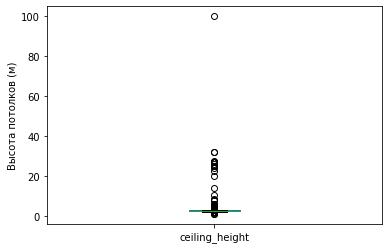

In [51]:
# построение boxplot
import matplotlib.pyplot as plt
check_ceiling_height['ceiling_height'].plot(kind='box')

plt.ylabel('Высота потолков (м)')
plt.show()

In [52]:
# сводная статистика
check_ceiling_height['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В наших данных **минимум** - это **1 метр**, а **максимум** - это **100 метров**.  
Ради любопытства посмотрим, что это за значения:

In [53]:
# выбрали максимум 100 метров
check_ceiling_height.query('ceiling_height == 100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19.0,санкт-петербург


In [54]:
# выбрали минимум 1 метр
check_ceiling_height.query('ceiling_height == 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed
22590,16,6000000.0,55.0,2018-10-31,2,1.0,12,32.4,7,False,...,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13.0,санкт-петербург


Оба значения в **Санкт-Петербурге**. Посмотрим, какая в принципе медиана по этим этажностям Санкт-Петербурге:

In [55]:
# проверка 5-этажных домов
print('Проверка 5-этажных домов:', end=' ')
print(check_ceiling_height.query('locality_name_changed == "санкт-петербург" and floors_total == 5')['ceiling_height'].median())

# проверка 12-этажных домов
print('Проверка 12-этажных домов:', end=' ')
print(check_ceiling_height.query('locality_name_changed == "санкт-петербург" and floors_total == 12')['ceiling_height'].median())

Проверка 5-этажных домов: 2.6
Проверка 12-этажных домов: 2.65


Несмотря на значительные выбросы медиана все равно справилась с задачей.

Ограничим боксплот относительно правдоподобными значениями потолка (например, от 2 до 5 метров) и посмотрим ещё раз сводную статистику:

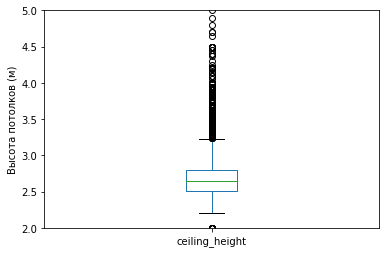

In [56]:
# построение boxplot
check_ceiling_height['ceiling_height'].plot(kind='box', ylim=(2, 5))

plt.ylabel('Высота потолков (м)')
plt.show()

In [57]:
# сводная статистика
print(check_ceiling_height['ceiling_height'].describe())

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


Половина всех объявлений имеют **высоту потолка от 2.5 до 2.8 метров**. В 1.5 межквартильных размаха укладывается значение **3.25 метров**. Значения кажутся реалистичными, учитывая, что в **элитном жилье** высота потолков может быть **больше 3 метров**.  

Будем называть **"правдоподобными"** значениям от **2 до 5 метров**. В сгруппированных данных посмотрим, какие медианы выбиваются из этого диапазона:

In [58]:
group_ceiling_height.query('height_median > 5 or height_median < 2').sort_values(by='height_median', ascending=False)

height_mean  height_median  \
locality_name_changed           floors_total                               
деревня мины                    5                   27.00          27.00   
деревня нижняя                  2                   27.00          27.00   
городской поселок большая ижора 2                   15.00          15.00   
санкт-петербург                 36                  14.85          14.85   
                                37                   1.75           1.75   

                                              height_std  
locality_name_changed           floors_total              
деревня мины                    5                    NaN  
деревня нижняя                  2                    NaN  
городской поселок большая ижора 2              16.970563  
санкт-петербург                 36             17.182695  
                                37                   NaN

Наблюдаем следующее:
- **деревня мины (5 этажа)** и **деревня нижняя (2 этажа)** - единственные в своем роде значения
- **санкт-петербург (36 этажей)** и **городской поселок большая ижора (2 этажа)** - рассматривали выше
- **санкт-петербург (37 этажей)** - тоже единственное значение

Напишем функцию, которая будет **заменять** значения, выходящие за рамки обозначенного диапазона на **пропуск**:

In [59]:
def replce_by_nan(height):
    """Функция заменяет на пропуск значения, выходящие за рамки обозначенного диапазона:
    - height - высота потолка."""
    try:
        if float(height) > 5:
            return np.nan
        elif float(height) < 2:
            return np.nan
        else:
            return float(height)
    except:
        if type(height) != float:          
            print('Внимание! В преобразованной колонке были значения типа данных НЕ float.')
            
# протестируем функцию
df = pd.DataFrame(data=[2.7, 45, 3.4, 0.8, 4.2, 1], columns=['name'])

# отработка без ошибки
df['name'] = df['name'].apply(replce_by_nan)
df

,name
0,2.7
1,NaN
2,3.4
3,NaN
4,4.2
5,NaN


In [60]:
df = pd.DataFrame(data=['high', 45, 3.4, 0.8, 3.2, 1], columns=['name'])

# отработка с ошибкой
df['name'] = df['name'].apply(replce_by_nan)
df

Внимание! В преобразованной колонке были значения типа данных НЕ float.


,name
0,NaN
1,NaN
2,3.4
3,NaN
4,3.2
5,NaN


In [61]:
# выведем количество экстремальных значений и пропусков ДО
print('Количество экстремальных значений ceiling_height ДО:', end=' ')
print(len(estate.query('ceiling_height > 5 or ceiling_height < 2')))
print('Количество пропусков в ceiling_height ДО:', end=' ')
print(len(estate[estate['ceiling_height'].isnull()]))

print()

# применим функцию, заменив экстремальные значения на NaN
estate['ceiling_height'] = estate['ceiling_height'].apply(replce_by_nan)

# выведем количество экстремальных значений и пропусков ПОСЛЕ для сверки
print('Количество экстремальных значений ceiling_height ПОСЛЕ:', end=' ')
print(len(estate.query('ceiling_height > 5 or ceiling_height < 2')))
print('Количество пропусков в ceiling_height ПОСЛЕ:', end=' ')
print(len(estate[estate['ceiling_height'].isnull()]))

Количество экстремальных значений ceiling_height ДО: 39
Количество пропусков в ceiling_height ДО: 9084

Количество экстремальных значений ceiling_height ПОСЛЕ: 0
Количество пропусков в ceiling_height ПОСЛЕ: 9123


Количество совпало (39 + 9084 = 9123), всё в порядке. Теперь можем заменить пропуски на медиану по этажам.  
Напишем функцию, которая будет брать группу, вычислять медиану по группе и заполнять ею **пропуск**:

In [62]:
def impute_median(series):
    """Функция берет Series и заполняет пропуски нужной группировкой."""
    return series.fillna(series.median())

In [63]:
# выведем количество пропусков ДО
print('Количество пропусков ДО:', estate['ceiling_height'].isnull().sum())

# заполним пропуски медианой по сгруппированным значениям
estate['ceiling_height'] = estate.groupby('floors_total')['ceiling_height'].transform(impute_median)

# выведем количество пропусков ПОСЛЕ
print('Количество пропусков ПОСЛЕ:', estate['ceiling_height'].isnull().sum())

Количество пропусков ДО: 9123
Количество пропусков ПОСЛЕ: 2


Не было заполнено два значения:

In [64]:
estate[estate['ceiling_height'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed
11575,9,9900000.0,101.0,2016-04-28,3,NaN,33,53.0,32,False,...,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,53.0,санкт-петербург
16934,5,4100000.0,40.0,2017-10-17,1,NaN,37,17.4,5,False,...,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0,санкт-петербург


Значит, по этим этажностям в принципе **не было** никаких правдоподобных значений по высоте потолка.  
Убедимся в этом, проверив **исходную версию** без изменений:

In [65]:
estate_raw.query('floors_total == 33 or floors_total == 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28,3,NaN,33.0,53.0,32,False,...,21.00,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


Значит, можем **удалить** эти значения:

In [66]:
# строки для удаления
to_delete = estate[estate['ceiling_height'].isnull()]

print('Размер датафрейма ДО удаления', len(estate))

# указываем строки с какими индексами нужно удалить 
estate = estate[~estate.index.isin(to_delete.index)]
estate.reset_index(drop=True, inplace=True)

print('Размер датафрейма ПОСЛЕ удаления', len(estate))

Размер датафрейма ДО удаления 23565
Размер датафрейма ПОСЛЕ удаления 23563


Было удалено 2 строки, как и задумывалось.

Мы проработали значения колонки *ceiling_height*, убрав явно нереалистичные значения и заменив пропуски предварительно проверенной **медианой**. Мы не смогли заполнить пропуск только по **двум значениям**. Они были **удалены** из рабочего датафрейма.

#### Колонка airports_nearest

In [67]:
# выведем количество пропусков в колонке
print('Количество пропусков в колонке "airports_nearest":', estate.airports_nearest.isnull().sum())

Количество пропусков в колонке "airports_nearest": 5524


Ранее мы уже определили проблему, что по некоторым локациям **не определились расстояния**. Посмотрим:
- сколько всего имеется **населенных пунктов** в данных
- сколько пунктов имеют информацию **расстояние до аэропорта**

In [68]:
print('Всего населенных пунктов:', estate.locality_name_changed.nunique())

review_airport = (estate[estate['airports_nearest'].notnull()]
              .groupby('locality_name_changed')['airports_nearest']
              .agg(['mean', 'median', 'std'])
              .sort_index())

print('Есть информация "расстояние до аэропорта" по:', len(review_airport), 'населенным пунктам')
review_airport

Всего населенных пунктов: 328
Есть информация "расстояние до аэропорта" по: 25 населенным пунктам


,mean,median,std
locality_name_changed,,,
зеленогорск,73300.250000,72282.0,3049.461011
колпино,26375.863501,26232.0,1578.628611
красное село,26610.028736,25723.5,2774.123105
кронштадт,67469.263158,67850.0,1648.522480
ломоносов,48308.280303,48415.5,1213.279691
павловск,21053.342105,20529.5,1298.399998
петергоф,40184.676617,39231.0,4077.653990
поселок александровская,12896.500000,12896.5,163.341666
поселок белоостров,57769.000000,57769.0,NaN


Информация по **расстоянию до аэропорта** определена всего лишь по **25 из 328 локаций** - это **около 8%**.  
Своими силами мы вряд ли заполним пропуски по тем локациям, где вообще нет информации. Но мы можем посмотреть, есть ли локации по которым можно заполнить пропуски, используя текущие данные:

Посчитаем количество строк по **локациям**, где есть **пропуски** в этой колонке:

In [69]:
# срез без информации по airports_nearest
no_info_airport = (estate[estate['airports_nearest'].isnull()]
               .groupby('locality_name_changed')['locality_name_changed']
               .agg(['count'])) # посчитаем количество пропусков

no_info_airport.columns = ['count_airport_nan']        
no_info_airport.sort_values(by='count_airport_nan', ascending=False).head(10)

,count_airport_nan
locality_name_changed,
мурино,586
кудрово,470
всеволожск,398
гатчина,307
выборг,237
деревня новое девяткино,143
сертолово,142
кириши,125
поселок бугры,113


Посчитаем **количество строк** и **медиану** по локациям, где есть информация:

In [70]:
# срез с информацией по airports_nearest
yes_info_airport = (estate[estate['airports_nearest'].notnull()]
            .groupby('locality_name_changed')['airports_nearest']
            .agg(['count', 'median'])) # посчитаем количество значений и медиану

yes_info_airport.columns = ['count_airport', 'median_airport_distance']
yes_info_airport

,count_airport,median_airport_distance
locality_name_changed,,
зеленогорск,24,72282.0
колпино,337,26232.0
красное село,174,25723.5
кронштадт,95,67850.0
ломоносов,132,48415.5
павловск,38,20529.5
петергоф,201,39231.0
поселок александровская,2,12896.5
поселок белоостров,1,57769.0


Посмотрим **пересечение** данных где есть пропуски и где есть информация:

In [71]:
print('Сможем заменить пропуски в количестве рядов:', end=' ')
print(no_info_airport.join(yes_info_airport, how='inner')['count_airport_nan'].sum())
no_info_airport.join(yes_info_airport, how='inner')

Сможем заменить пропуски в количестве рядов: 92


,count_airport_nan,count_airport,median_airport_distance
locality_name_changed,,,
колпино,1,337,26232.0
красное село,2,174,25723.5
кронштадт,1,95,67850.0
ломоносов,1,132,48415.5
поселок шушары,3,436,17427.0
санкт-петербург,84,15565,26764.0


Мы сможем заменить пропуски какой-либо статистикой только по **6 локациям** в **92 строках**.  
В **маленьких** локациях расстояние до аэропорта, скорее всего, **похоже**. Однако в **Санкт-Петербурге** оно может **различаться** достаточно сильно. Проверим это:

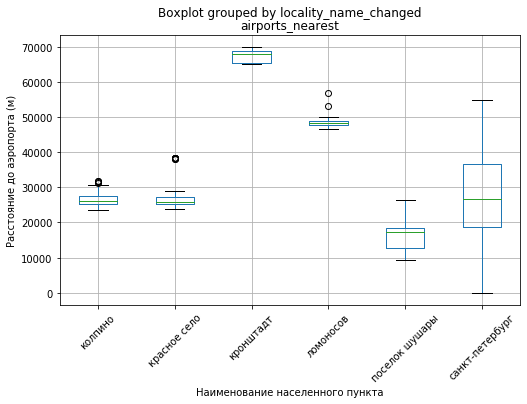

In [72]:
# список проверяемых названий
list_check_airport = ['колпино', 'красное село', 'кронштадт', 'ломоносов', 'поселок шушары', 'санкт-петербург']

(estate[estate['locality_name_changed'].isin(list_check_airport)]
     .boxplot(column = 'airports_nearest', by = 'locality_name_changed', rot = 45, figsize=(8, 5))
)

plt.xlabel('Наименование населенного пункта')
plt.ylabel('Расстояние до аэропорта (м)')
plt.show()

In [73]:
# отдельно выведем статистику по Санкт-Петербургу
print(estate.query('locality_name_changed == "санкт-петербург"')['airports_nearest'].describe())

count    15565.000000
mean     28041.477674
std      11549.259422
min          0.000000
25%      18575.000000
50%      26764.000000
75%      36587.000000
max      54784.000000
Name: airports_nearest, dtype: float64


Так и есть: в **Санкт-Петербурге** самый большой межквартильный размах. **Половина** всех имеющихся значений лежит в диапазоне от **18 до 36 км**, **медиана** равна **26 км**. По **Санкт-Петербургу** лучше оставить пропуски без изменений, а для **небольших локаций** можно сделать замену на медиану.  

В нашем случае речь идёт **всего лишь о 8 объявлениях**, где мы можем сделать более-менее адекватную замену.  
Произведем замену пропуска медианой для маленьких локаций:

In [74]:
# выведем количество пропусков ДО замены
print('Количество пропусков по Санкт-Петербургу ДО:', end=' ')
print(estate.loc[estate['locality_name_changed'] == 'санкт-петербург', 'airports_nearest'].isnull().sum())

# сделаем замену пропусков по Спб на -1
print('Количество замененнных на "-1" значений:', end=' ')
estate.loc[estate['locality_name_changed'] == 'санкт-петербург', 'airports_nearest'] = (estate
            .loc[estate['locality_name_changed'] == 'санкт-петербург', 'airports_nearest'].fillna(-1))
print(len(estate.query('airports_nearest == -1')))

# теперь количество пропусков по Спб должно быть 0
print('Количество пропусков по Санкт-Петербургу:', end=' ')
print(estate.loc[estate['locality_name_changed'] == 'санкт-петербург', 'airports_nearest'].isnull().sum())

# сделаем замену остальных пропусков по маленьким локациям медианой
def impute_median(series):
    return series.fillna(series.median())

estate['airports_nearest'] = estate.groupby('locality_name_changed')['airports_nearest'].transform(impute_median)

# заменим -1 обратно на NaN и проверим, чтобы количество совпадало
print('Количество пропусков по Санкт-Петербургу ПОСЛЕ:', end=' ')
estate['airports_nearest'] = estate['airports_nearest'].replace(-1, np.nan)
print(estate.loc[estate['locality_name_changed'] == 'санкт-петербург', 'airports_nearest'].isnull().sum())

Количество пропусков по Санкт-Петербургу ДО: 84
Количество замененнных на "-1" значений: 84
Количество пропусков по Санкт-Петербургу: 0
Количество пропусков по Санкт-Петербургу ПОСЛЕ: 84


In [75]:
print('Количество пропусков в airports_nearest:', len(estate[estate['airports_nearest'].isnull()]))

Количество пропусков в airports_nearest: 5516


Пропусков стало **на 8 меньше** - значит, замена получилась.

#### Колонка cityCenters_nearest

In [76]:
# выведем количество пропусков в колонке
print('Количество пропусков в колонке "cityCenters_nearest":', estate.cityCenters_nearest.isnull().sum())

Количество пропусков в колонке "cityCenters_nearest": 5501


Посмотрим аналогичную информацию, что и по аэропорту:
- сколько **всего** имеется населенных пунктов в данных
- сколько пунктов имеют информацию **расстояние до центра**
- сколько **сможем заполнить** по имеющимся данным

In [77]:
print('Всего населенных пунктов:', estate.locality_name_changed.nunique())

review_center = (estate[estate['cityCenters_nearest'].notnull()]
              .groupby('locality_name_changed')['cityCenters_nearest']
              .agg(['mean', 'median', 'std'])
              .sort_index())

print('Есть информация "расстояние до центра" по:', len(review_center), 'населенным пунктам')
review_center

Всего населенных пунктов: 328
Есть информация "расстояние до центра" по: 25 населенным пунктам


,mean,median,std
locality_name_changed,,,
зеленогорск,54617.583333,53381.0,3189.936893
колпино,32113.771513,32018.0,1505.624864
красное село,30034.741379,29148.5,2774.169714
кронштадт,49195.726316,49575.0,1647.487232
ломоносов,50739.969697,51677.0,4003.546382
павловск,33206.921053,32683.0,1298.380996
петергоф,35468.925373,33771.0,5687.914990
поселок александровская,27468.000000,27468.0,164.048773
поселок белоостров,38868.000000,38868.0,NaN


Снова отсутствует информация по **25 населенным пунктам**.  
Посмотрим, что можем заполнить по имеющимся данным:

In [78]:
# срез без информации по cityCenters_nearest
no_info_center = (estate[estate['cityCenters_nearest'].isnull()]
           .groupby('locality_name_changed')['locality_name_changed']
           .agg(['count'])) # посчитаем количество пропусков

no_info_center.columns = ['count_center_nan']        
no_info_center.sort_values(by='count_center_nan', ascending=False).head(10)

,count_center_nan
locality_name_changed,
мурино,586
кудрово,470
всеволожск,398
гатчина,307
выборг,237
деревня новое девяткино,143
сертолово,142
кириши,125
поселок бугры,113


In [79]:
# срез с информацией по cityCenters_nearest
yes_info_center = (estate[estate['cityCenters_nearest'].notnull()]
            .groupby('locality_name_changed')['cityCenters_nearest']
            .agg(['count', 'median'])) # посчитаем количество значений и медиану

yes_info_center.columns = ['count_center', 'median_center_distance'] 
yes_info_center

,count_center,median_center_distance
locality_name_changed,,
зеленогорск,24,53381.0
колпино,337,32018.0
красное село,174,29148.5
кронштадт,95,49575.0
ломоносов,132,51677.0
павловск,38,32683.0
петергоф,201,33771.0
поселок александровская,2,27468.0
поселок белоостров,1,38868.0


Посмотрим **пересечение данных** где есть пропуски и где есть информация:

In [80]:
print('Сможем заменить пропуски в количестве рядов:', end=' ')
print(no_info_center.join(yes_info_center, how='inner')['count_center_nan'].sum())
no_info_center.join(yes_info_center, how='inner')

Сможем заменить пропуски в количестве рядов: 69


,count_center_nan,count_center,median_center_distance
locality_name_changed,,,
колпино,1,337,32018.0
красное село,2,174,29148.5
кронштадт,1,95,49575.0
ломоносов,1,132,51677.0
поселок шушары,3,436,24212.0
пушкин,1,368,27930.5
санкт-петербург,60,15589,12242.0


Сможем заменить **пропуски** в **69 случаях**. Построим боксплоты для этих локаций:

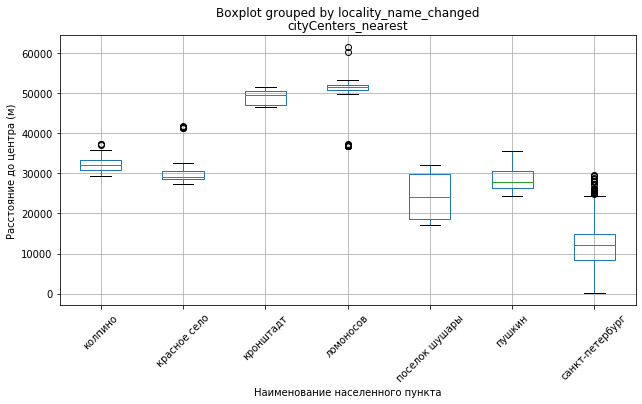

In [81]:
list_check_center = ['колпино', 'красное село', 'кронштадт', 'ломоносов', 'поселок шушары', 'пушкин', 'санкт-петербург']

(estate[estate['locality_name_changed'].isin(list_check_center)]
     .boxplot(column = 'cityCenters_nearest', by = 'locality_name_changed', rot = 45, figsize=(10, 5))
)

plt.xlabel('Наименование населенного пункта')
plt.ylabel('Расстояние до центра (м)')
plt.show()

In [82]:
# отдельно выведем статистику по Санкт-Петербургу
print(estate.query('locality_name_changed == "санкт-петербург"')['cityCenters_nearest'].describe())

count    15589.000000
mean     11587.357816
std       4831.623596
min        181.000000
25%       8322.000000
50%      12242.000000
75%      14938.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64


In [83]:
# отдельно выведем статистику по поселку Шушары
estate.query('locality_name_changed == "поселок шушары"')['cityCenters_nearest'].describe()

count      436.000000
mean     24243.387615
std       5502.810462
min      17012.000000
25%      18506.250000
50%      24212.000000
75%      29846.000000
max      32079.000000
Name: cityCenters_nearest, dtype: float64

В случае с **центром** самый большой межквартильный размах у **поселка Шушары**. У **Санкт-Петербурга** размех меньше, но визуально большой хвост **выбросов**. В остальные локациях встречаются выбросы, но в целом размах меньше.

Поскольку речь идёт о **69 значениях** и межквартильных размах по обоим локациям **меньше**, чем в случае с аэропортом Спб, примем решение сделать **замену во всех строках**. Строки, по которым не было найдено соответствие, оставим без изменений.

In [84]:
# функция берет Series и заполняет пропуски нужной группировкой
def impute_median(series):
    return series.fillna(series.median())

# выведем количество пропусков ДО
print('Количество пропусков ДО:', estate['cityCenters_nearest'].isnull().sum())

# заполним пропуски медианой по сгруппированным значениям
estate['cityCenters_nearest'] = estate.groupby(['locality_name_changed'])['cityCenters_nearest'].transform(impute_median)

# выведем количество пропусков ПОСЛЕ
print('Количество пропусков ПОСЛЕ:', estate['cityCenters_nearest'].isnull().sum())

Количество пропусков ДО: 5501
Количество пропусков ПОСЛЕ: 5432


Итак, **69 значений** было исправлено, как и было задумано.

Выведем список локаций, по которым вообще **не определилось** расстояние ни до аэропорта, ни до центра.  
В данном списке есть в т. ч. и локации, входящие **в топ-список по количеству объявлений** (например, Мурино и Кудрово).  
Почему для популярных локаций не определяется расстояние - это отдельный вопрос. 

In [85]:
estate[estate['airports_nearest'].isnull()]['locality_name_changed'].value_counts().head(10)

мурино                     586
кудрово                    470
всеволожск                 398
гатчина                    307
выборг                     237
деревня новое девяткино    143
сертолово                  142
кириши                     125
поселок бугры              113
сланцы                     112
Name: locality_name_changed, dtype: int64

#### Колонка days_exposition

**Пропуски** в этой колонке можно объяснить тем, что квартира **не была снята** с сервиса. Возможно, потому что не была продана.  
Возможно, квартиры, снятые из объявлений, тоже не были проданы: люди передумали, перешли на другой сервис и др. Но для упрощения будем считать их **проданными**.

Посмотрим ситуацию по продаже квартир:

In [86]:
print('Количество квартир всего:', len(estate))
print('Количество непроданных квартир:', len(estate[estate['days_exposition'].isnull()]))

Количество квартир всего: 23563
Количество непроданных квартир: 3171


Квартиры постепенно уходят из объявлений, но **нераспроданными остались 13%** - в данном случае имеет смысл оставить пропуски.  
Проверим, чтобы не было **отрицательных и нулевых** значений, т. к. речь идёт о количестве дней:

In [87]:
# проверка наличия 0 и отрицательных значений
estate.query('days_exposition <= 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed


Таких значений нет, всё в порядке.

#### Колонки living_area, kitchen_area

В датафрейме есть три колонки, связанные с **площадью квартиры**: *living_area*, *kitchen_area* и *total_area*.  
Логично предположить, что все они взаимосвязаны. Так, с увеличением *total_area*, скроее всего, будет расти и *living_area*.

При этом на **кухне** это должно сказаться **меньше**. К примеру, имея 10 комнат вряд ли будет больше 5 кухонь или одна кухня с огромной площадью.

Соотнесем колонки с **площадью** и  посмотрим на их взаимосвязь. Дополнительно выведем **коэффициент корреляции**.

In [88]:
# матрица с корреляциями
print(estate[['kitchen_area', 'living_area', 'total_area']].corr())

              kitchen_area  living_area  total_area
kitchen_area      1.000000     0.428871    0.609212
living_area       0.428871     1.000000    0.939770
total_area        0.609212     0.939770    1.000000


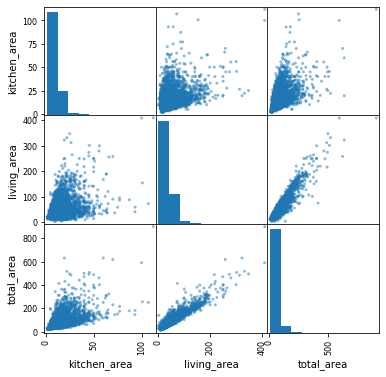

In [89]:
# визуализация матрицы с корреляциями
pd.plotting.scatter_matrix(estate[['kitchen_area', 'living_area', 'total_area']], figsize=(6, 6))
plt.show()

- Наблюдается **сильная положительная взаимосвязь** (кореляция на уровне 0.94) между *living_area* и *total_area*, что выглядит вполне естественно: чем больше **общая площадь**, тем больше и **жилая**. 

- С **кухней** наши догадки подтвердились: **общая площадь** и **кухня** взаимосвязаны (коэффициент корреляции равен 0.6), но не так сильно, как, например, общая  и жилая площадь (коэффициент корреляции 0.94). 

Разберемся со значениями колонки *kitchen_area*:

In [90]:
# выведем количество пропусков в колонке
print('Количество пропусков в колонке "kitchen_area":', estate.kitchen_area.isnull().sum())

Количество пропусков в колонке "kitchen_area": 2222


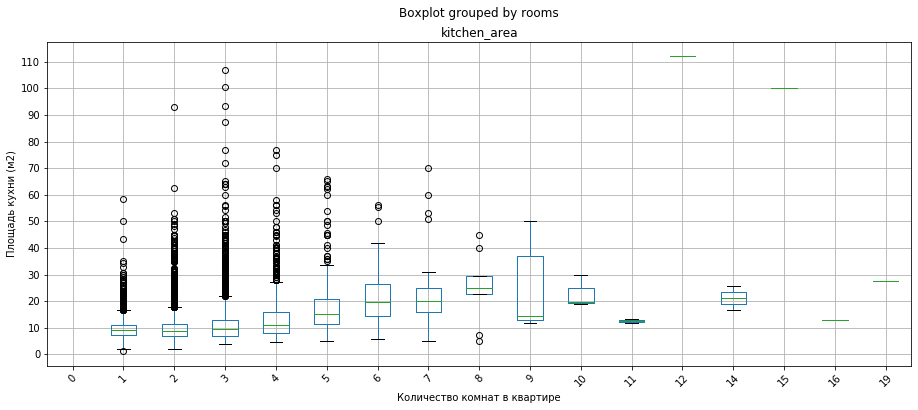

In [91]:
# посмотрим боксплоты по количеству комнат
estate.boxplot(column = 'kitchen_area', by = 'rooms', rot = 45, figsize=(15, 6))

# для удобства проставим значения по оси y
plt.yticks([i*10 for i in range(12)])
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Площадь кухни (м2)')
plt.show()

In [92]:
# посчитаем количество объявлений по разным rooms
estate['rooms'].value_counts(ascending=True)

15       1
16       1
12       1
19       1
11       2
14       2
10       3
9        8
8       12
7       59
6      104
0      194
5      325
4     1172
3     5778
2     7897
1     8003
Name: rooms, dtype: int64

- Для квартир с **0 комнат** нет **площади по кухням**. Это **студии** либо **открытые планировки**, где разграничение кухонной и жилой зоны условно.
- Для **"стандартных" квартир (1, 2, 3 комнаты)** размер кухни довольно похож. У квартир с **разным количеством комнат** могут быть **похожи кухни**.
- Для **4 комнат** размах уже больше, но медиана не далеко ушла от **10 метров**.
- Далее для **5, 6, 7 комнат** размер кухни постепенно начинает **расти**, но стоит учесть, что и **снижается количество объявлений**. 
- Начиная с **8 комнат и более** очень сложно сказать что-то о размере кухни, т.к. число таких объявлений **очень мало**.

Можно было бы заполнить пропуски **медианой** по **стандартным квартирам - 1, 2, 3 комнаты**. По остальным квартирам объявлений меньше, а вариативность больше, поэтому использовать медиану было бы не совсем корректно. 

Проверим дополнительно, что наши догадки по **0 комнатам** верны - это либо студия, либо открытая планировка.   
Проверим условия: если **комнат 0 и это НЕ студия**, то, значит, это **открытая планировка**, и наоборот, если **комнат 0 и это НЕ открытая планировка**, то это **студия**:

In [93]:
# проверим условия: комнат 0, но это НЕ студия
print('Всего значений, где комнат 0, но это НЕ студия:', end=' ')
print(len(estate.query('rooms == 0 and studio == False')['open_plan']))
print('Из этих значений с открытой планировкой:', end=' ')
print(len(estate.query('rooms == 0 and studio == False and open_plan == True')))

print()

# проверим условия: комнат 0, но это НЕ открытый план
print('Всего значений, где комнат 0, но это НЕ открытая планировка:', end=' ')
print(len(estate.query('rooms == 0 and open_plan == False')['studio']))
print('Из этих значений студии:', end=' ')
print(len(estate.query('rooms == 0 and open_plan == False and studio == True')))

Всего значений, где комнат 0, но это НЕ студия: 59
Из этих значений с открытой планировкой: 59

Всего значений, где комнат 0, но это НЕ открытая планировка: 135
Из этих значений студии: 135


Да, всё в порядке. Если **комнат 0**, то это либо **студия**, либо **открытая планировка**.

Теперь посмотрим, какая ситуация по *living_area*:

In [94]:
# выведем количество пропусков в колонке
print('Количество пропусков в колонке "living_area":', estate.living_area.isnull().sum())

Количество пропусков в колонке "living_area": 1865


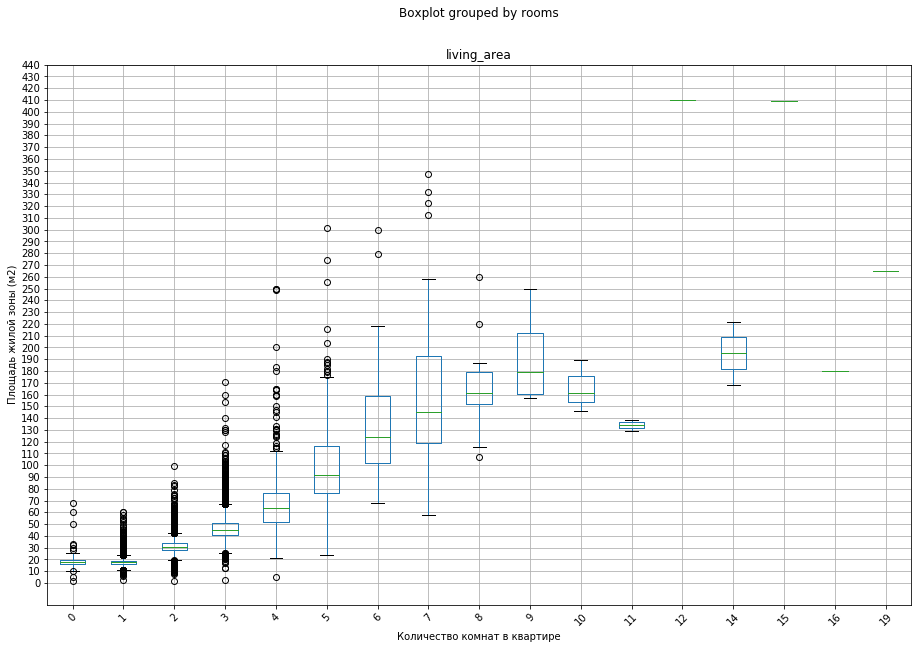

In [95]:
# посмотрим боксплоты по количеству комнат
estate.boxplot(column = 'living_area', by = 'rooms', rot = 45, figsize=(15, 10))

plt.yticks([i*10 for i in range(45)])
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Площадь жилой зоны (м2)')
plt.show()

Видим ещё раз подтверждение идеи, что с **увеличением** числа **комнат** растёт и **площадь жилой зоны**.
Начиная с **3 комнат** размах все больше, а объявлений всё меньше. 

#### Колонка first_day_exposition

Проверим, чтобы у нас **не было "дат из будущего"** - то что свежее 2020 года будем считать некорректным.

In [96]:
estate.query('first_day_exposition >= 2020')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed


#### Общая информация по обработанному датафрейму

Итак, мы ознакомились с полученными данными, проверили их на адекватность и в случае необходимости внесли изменения.  
После обработки всех колонок ещё раз проверим данные на наличие **дубликатов**:

In [97]:
# проверка дубликатов
estate.duplicated().sum()

0

Дубликатов не обнаружено, значим, будем работать с датафреймом в **текущем виде**.  
Выведем общую информацию по обработанному датафрейму:

In [98]:
# вывод общей информации по датафрейму
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23563 entries, 0 to 23562
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23563 non-null  int64         
 1   last_price             23563 non-null  float64       
 2   total_area             23563 non-null  float64       
 3   first_day_exposition   23563 non-null  datetime64[ns]
 4   rooms                  23563 non-null  int64         
 5   ceiling_height         23563 non-null  float64       
 6   floors_total           23563 non-null  int32         
 7   living_area            21698 non-null  float64       
 8   floor                  23563 non-null  int64         
 9   is_apartment           23563 non-null  bool          
 10  studio                 23563 non-null  bool          
 11  open_plan              23563 non-null  bool          
 12  kitchen_area           21341 non-null  float64       
 13  b

In [99]:
# выведем оставшиеся пропуски
estate.isnull().sum().sort_values(ascending=False)

parks_nearest            15533
ponds_nearest            14529
airports_nearest          5516
ponds_around3000          5500
parks_around3000          5500
cityCenters_nearest       5432
days_exposition           3171
kitchen_area              2222
living_area               1865
locality_name_changed        0
floors_total                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
open_plan                    0
floor                        0
is_apartment                 0
studio                       0
balcony                      0
locality_name                0
total_images                 0
dtype: int64

## Шаг 2. Вывод

Мы преобразовали исходные данные. Основная наша задача состояла в том, чтобы:
- Проверить значения на **реалистичность**. Например, чтобы номер этажа не превышал количество этажей в доме.
- Заменить **пропуски**, если это возможно и если это нужно для будущих задач.
- Изменить **тип данных колонки** на более подходящий.

Описание работы над колонками:

- **Колонка is_apartment**:
 - Предположили, что если значение не было указано, значит, это **не апартаменты** и можно заменить пропуск **False**.
 - Преобразовали тип данных в **boolean**.
 

- **Колонки parks_around3000 и ponds_around3000**
 - Заметили, что значения в этих колонках пропущены в **одних и тех же строках**. Кроме того, в этих строках вообще **отсутствовала** какая-либо информация **по расстояниям** (до аэропорта, центра).
 - Проверили, чтобы в колонке **не было дробных чисел**.
 - Приняли решение **оставить** пропуски.
 - Заменили тип данных на более подходящий **Int64**


- **Колонки parks_nearest и ponds_nearest**
 - **Сопоставили значения** с parks_around3000 и ponds_around3000. Если бы пропускам соответствовало бы какое-то количество парков / прудов, это могло бы значит, что до ближайшего парка / пруда не более 3 км.
 - Посмотрели, какие **расстояния** до этих объектов есть в нашем датафрейме, построив гистограммы.
 - Проверили предположение, не характерна ли проблема **пропусков** только для **маленьких поселений**. Предположение **не подтвердилось**, т. к. очень много значений пришлось в т.ч. на Санкт-Петербург.
 - Пропуски и тип данных оставлены **без изменений**.


- **Колонка balcony**
 - Предположили, что **пропуску** соответствует **0 балконов** и сделали **замену на 0**.
 - Заменили **пропуски** значением **0**.
 - Поменяли тип данных на **int**.


- **Колонка locality_name**
 - Удалили **пропуски** в колонке (всего было **49 пропусков**).
 - Сделали единообразным **написание названий**: замена буквы "ё", нижний регистр.
 - Проверили, есть ли в названиях **пропуски** таких **слов**, как "деревня", "посёлок". Пропуски были, но мы пришли к выводу, что убирать эти слова без разбора абсолютно везде не корректно, т.к. могут встретиться два населенных пункта с одним названием.
 - Мы проверили написание **наиболее часто встречающихся имен собственных** и убедились, что присвоить им одно название будет корректно, т. к. это **одна и та же локация**.


- **Колонка floors_total**
 - Проверили, чтобы **номер этажа** был не больше **общего количества этажей** в доме.
 - **Удалили 85 пропусков**.
 - Поменяли тип данных на **int**, т. к. избавились от **NaN**.
 
 
- **Колонка ceiling_height**
 - В целом **высота потолков** везде **похожа**.
 - **Аномально большие значения** потолков часто происходят из-за **описки**: вместо 2.7 метров потолок 27 метров. Аномально **маленькие** значения тоже встречались, но реже.
 - Учитывая похожесть потолков и описки, мы приняли решение **не удалять** эти аномальные значения, а **заменить** их **медианой**, учитывая **этажность дома**.
 
 
- **Колонка airports_nearest**
 - В датафрейме из **328 населенных пунктов** определилась информация только по **25 локациям** и то не во всех случаях.
 - По имеющимся даннным можно было бы сделать замену **92 пропусков**.
 - Сделана **замена по небольшим населенным пунктам**. В **Санкт-Петербурге не сделана замена** из-за большого размаха в расстоянии, данные оставлены в исходном виде.
 
 
- **Колонка cityCenters_nearest**
 - Похожая ситуация, что и с аэропортом: информация присутствует только по **25 населенным пунктам**.
 - По имеющимся даннным можно было бы сделать замену **69 пропусков**.
 - Из-за **меньшей вариативности** в расстоянии и **небольшом количестве значений** было принято решение сделать замену **всех 69 пропусков**.
 
 
- **Колонка days_exposition**
 - Сделали предположение, что **пропуски** - это не снятые с сервиса объявления. Для упрощения, решили считать, что такие квартиры **не были проданы**.
 
 
- **Колонки living_area, kitchen_area**
 - Обнаружили, что в **"стандартных" квартирах** (1, 2, 3 комнаты) **кухни** достаточно **похожи** по размеру. Для квартир с таким количеством комнат **пропуск** можно было бы заменить медианой.
 - Вариативность в площади **комнат** выше. Квартиры с 0, 1, 2 комнатами похожи, поэтому размер living_room можно было бы заменить медианой.


- **Колонка first_day_exposition**
 - Проверили отсутствие некорретных "дат из будущего" (больше 2020 года).

## Шаг 3. Расчёт показателей

Исходя из имеющихся данных, необходимо рассчитать следующие показатели:
- 3.1. Цена за квадратный метр;
- 3.2. День недели, месяц, год публикации объявления;
- 3.3. Категоризация этажей: первый, последний, другой;
- 3.4. Соотношение жилой и общей площади, площади кухни и общей площади.

### 3.1. Цена за квадратный метр

Для получения **цены за квадратный метр** нужно поделить цену (*last_price*) на общую площадь (*total_area*).  
Обе колонки не содержат пропусков и имеют нужный формат данных, поэтому пропусков в новой колонке также не ожидается.  

Дадим новой колонке название *rub_per_m2*:

In [100]:
# создание новой колонки rub_per_m2
estate['rub_per_m2'] = estate['last_price'].div(estate['total_area'])
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed,rub_per_m2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,санкт-петербург,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,поселок шушары,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,санкт-петербург,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,санкт-петербург,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,санкт-петербург,100000.000000


### 3.2. День недели, месяц, год публикации объявления

Поскольку колонка с датой приведена в нужный тип **datetime**, можем выделить **день недели, месяц и год** публикации:

In [101]:
# выделяем из даты ГОД
estate['year_exposition'] = estate['first_day_exposition'].dt.year

# выделяем из даты МЕСЯЦ
estate['month_exposition'] = estate['first_day_exposition'].dt.month

# выделяем из даты ДЕНЬ НЕДЕЛИ
estate['weekday_exposition'] = estate['first_day_exposition'].dt.weekday

estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed,rub_per_m2,year_exposition,month_exposition,weekday_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,санкт-петербург,120370.370370,2019,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0,NaN,0,NaN,81.0,поселок шушары,82920.792079,2018,12,1
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,1,90.0,2,574.0,558.0,санкт-петербург,92785.714286,2015,8,3
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,NaN,9,False,...,2,84.0,3,234.0,424.0,санкт-петербург,408176.100629,2015,7,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112.0,1,48.0,121.0,санкт-петербург,100000.000000,2018,6,1


### 3.3. Категоризация этажей: первый, последний, другой

Напишем функцию для **категоризации этажей**, используя значения колонок *floor* и *floor_total*:
- **первый** - если floor == 1
- **последний** - если floor == floor_total
- **другой** - если таж не попадает в предыдущие две категории

In [102]:
def categorize_floor(row):
    """ Возвращает категорию этажа, используя правила:
    - 'первый' при значении floor == 1
    - 'последний' если значение floor равно floor_total
    - 'другой' если этаж не попадает в предыдущие две категории
    """
    floor_check = row['floor']
    floor_total_check = row['floors_total']
    
    if floor_check == 1:
        return 'первый'
    elif floor_check == floor_total_check:
        return 'последний'
    else:
        return 'другой'
    
# создание тестового датафрейма
floor_test = pd.DataFrame({
    'floor': [5, 12, 3, 1, 16, 1],
    'floors_total': [7, 16, 5, 5, 16, 1]
})
floor_test

# применение функции к тестовому датарфрей
floor_test['floor_group'] = floor_test.apply(categorize_floor, axis=1)
floor_test

,floor,floors_total,floor_group
0,5,7,другой
1,12,16,другой
2,3,5,другой
3,1,5,первый
4,16,16,последний
5,1,1,первый


Функция отработала корректно, можем сделать категоризацию этажей:

In [103]:
# создание новой колонки floor_group
estate['floor_group'] = estate.apply(categorize_floor, axis=1)
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed,rub_per_m2,year_exposition,month_exposition,weekday_exposition,floor_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,санкт-петербург,120370.370370,2019,3,3,другой
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,NaN,0,NaN,81.0,поселок шушары,82920.792079,2018,12,1,первый
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,90.0,2,574.0,558.0,санкт-петербург,92785.714286,2015,8,3,другой
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,NaN,9,False,...,84.0,3,234.0,424.0,санкт-петербург,408176.100629,2015,7,4,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,санкт-петербург,100000.000000,2018,6,1,другой


### 3.4. Соотношение жилой и общей площади, площади кухни и общей площади

Создадим новые колонки:
- *living_vs_total*: деление *living_area* на *total_area*
- *kitchen_vs_total*: деление *living_area* на *total_area*

In [104]:
# соотношение living_area к total_area
estate['living_vs_total'] = estate['living_area'].div(estate['total_area'])
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_changed,rub_per_m2,year_exposition,month_exposition,weekday_exposition,floor_group,living_vs_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,NaN,санкт-петербург,120370.370370,2019,3,3,другой,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,0,NaN,81.0,поселок шушары,82920.792079,2018,12,1,первый,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,2,574.0,558.0,санкт-петербург,92785.714286,2015,8,3,другой,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,NaN,9,False,...,3,234.0,424.0,санкт-петербург,408176.100629,2015,7,4,другой,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,санкт-петербург,100000.000000,2018,6,1,другой,0.320000


In [105]:
# соотношение kitchen_area к total_area
estate['kitchen_vs_total'] = estate['kitchen_area'].div(estate['total_area'])
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_changed,rub_per_m2,year_exposition,month_exposition,weekday_exposition,floor_group,living_vs_total,kitchen_vs_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,санкт-петербург,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,NaN,81.0,поселок шушары,82920.792079,2018,12,1,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,574.0,558.0,санкт-петербург,92785.714286,2015,8,3,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,NaN,9,False,...,234.0,424.0,санкт-петербург,408176.100629,2015,7,4,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,санкт-петербург,100000.000000,2018,6,1,другой,0.320000,0.410000


Посмотрим, как выгляди **соотношение площадей** для разных квартир, построив боксплоты:

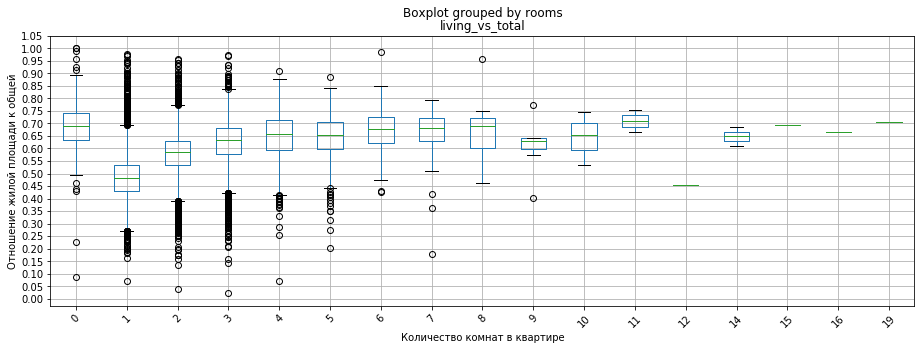

In [106]:
# боксплот для соотношения living_area к total_area
estate.boxplot(column = 'living_vs_total', by = 'rooms', rot = 45, figsize=(15, 5))

# для удобства проставим значения по оси y
plt.yticks([i*0.05 for i in range(22)])

plt.xlabel('Количество комнат в квартире')
plt.ylabel('Отношение жилой площади к общей')
plt.show()

На боксплоте для *living_vs_total*:
- Для квартир с **0 комнатами** (т.е. для студий, свободных планировок) **самое высокое** значение соотношения. Медиана немного меньше 0.7.  
Это объяснимо тем, что в таких квартирах **нет четкого разграничения** между кухней и жилым пространством.


- Если говорить о квартирах **с комнатами**, то наблюдается постепенный **рост соотношения** жилого пространства к общему, что тоже логично. Мы видели, что *living_area* имеет сильную положительную корреляцию *total_area* и что с **увеличением числа комнат** увеличивается также и **жилое пространство**.


- Начиная с 7-комнатных квартир соотношение практически не увеличивается. Но важно отметить, что начиная с 7-комнатных квартир объявлений становится **гораздо меньше**. Поэтому нельзя сделать однозначные выводы по поводу соотношения.

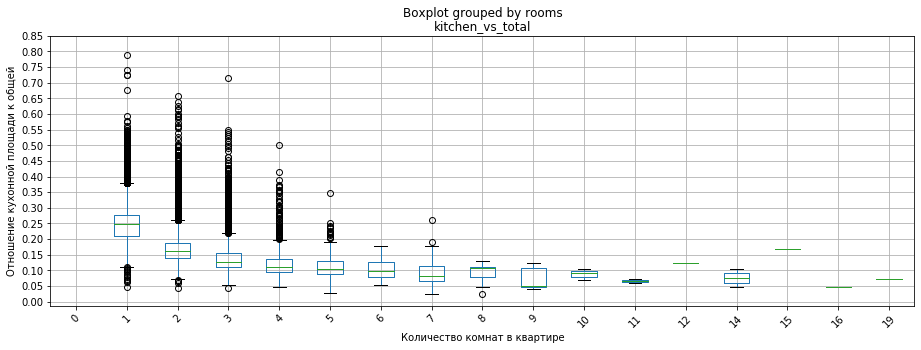

In [107]:
# боксплот для соотношения kitchen_area к total_area
estate.boxplot(column = 'kitchen_vs_total', by = 'rooms', rot = 45, figsize=(15, 5))

# для удобства проставим значения по оси y
plt.yticks([i*0.05 for i in range(18)])
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Отношение кухонной площади к общей')
plt.show()

На боксплоте для *kitchen_vs_total*:

- Соотношений для квартир с **0 комнатами** нет по тем же причинам: отсутствие четкого разграничения между **кухней** и **гостиной**.


- С увеличением количества **комнат** постепенно **снижается** соотношение **кухни** к **общей площади**. Это тоже согласуется с нашим предположением, которое мы высказали ещё на первом этапе: даже при большой площади квартиры вряд ли будут делать **огромную кухню** или **большое количество** кухонь.

## Шаг 3. Вывод

Созданы колонки с запрашиваемой в задании информацией:
- **Цена квадратного метра**. Получена путём деления цены квартиры на общую площадь.


- **День недели, месяц и год публикации объявления**. Информация была выделена из колонки *first_day_exposition*, которая имеет 
формат datetime.


- **Этаж квартиры: первый, последний, другой**. Создана функция для категоризации этажей на основе информации из колонок *floor* и *floors_total*.


- **Соотношение площадей (кухня к общей, жилая к общей)**. Рассчитано соотношение путем деления соответствующей площади к общей площади.


## Шаг 4. Проведение исследовательского анализа данных

На данном этапе необходимо изучить следующие вопросы:
- 4.1. Распределение параметров: площадь, цена, число комнат, высота потолков;
- 4.2. Изучение времени продажи квартиры;
- 4.3. Изучение зависимости цены от выбранных параметров.

### 4.1. Распределение параметров: площадь, цена, число комнат, высота потолков

Создадим функцию, которая будет выводить гистограмму и сводную статистику по указанной колонке:

In [108]:
def describe_hist(df_name, col_name, xlabel, describe=True, bins=20,
                  range_hist=None, xticks=None, yticks=None, figsize=(6, 4)):
    
    """Функция выводит гистограмму и сводную статистику по указанной колонке:
    - df_name - наименование датафрейма;
    - col_name - наименование колонки (в кавычках);
    - xlabel - наименование оси Х;
    - describe (по умолчанию True) - нужно ли выводить сводную статистику;
    - bins (по умолчанию 20) - количество bins;
    - range_hist - диапазон range;
    - xticks - значения xticks;
    - yticks - значения yticks;
    - figsize - значение figsize."""
    
    df_name.plot(y=col_name, kind='hist', bins=bins, grid=True, range=range_hist, rot=45, figsize=figsize)
    
    plt.xlabel(xlabel)
    plt.ylabel('Количество объявлений')
    
    plt.xticks(xticks)
    plt.yticks(yticks)

    plt.show()
    
    if describe:
        return df_name[[col_name]].describe()

#### Колонка total_area

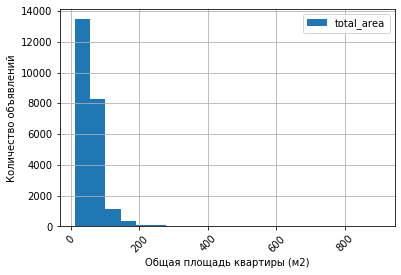

,total_area
count,23563.000000
mean,60.321960
std,35.657342
min,12.000000
25%,40.000000
50%,52.000000
75%,69.700000
max,900.000000


In [109]:
# колонка total_area
describe_hist(estate, 'total_area', 'Общая площадь квартиры (м2)')

- **Половина** всех предложений варьируется **от 40 до 70 квадратных метров**.  
- **Максимум** в **900 квадратных метров** выглядит неправдоподобно.  
- На гистограмме **большинство объявлений** имеют **площадь** квартиры **не больше 200 метров квадратных**. Из-за объявления с 900 м2, график выглядит смещённым и не очень детальным.  

Для большей наглядности сделаем **ограничение** диапазона **до 200 квадратных метров**:

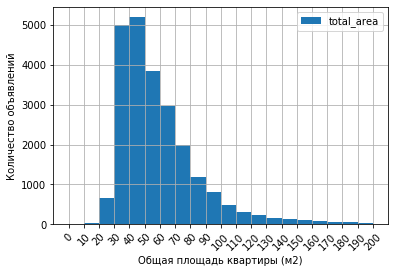

In [110]:
# ограничение range=(0, 200)
describe_hist(estate, 'total_area', 'Общая площадь квартиры (м2)', describe=False, range_hist=(0, 200), xticks=[i*10 for i in range(21)])

- Больше 90 метров предложений тоже не очень много. В основном публикуются объявления со **"стандартными"** квартирами **от 30 до 90 метров**.

#### Колонка last_price

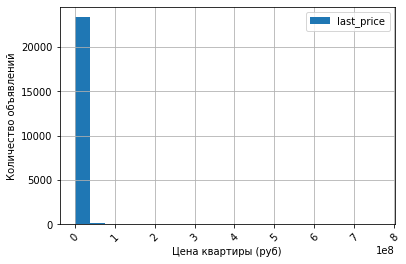

,last_price
count,2.356300e+04
mean,6.540019e+06
std,1.091136e+07
min,1.219000e+04
25%,3.400000e+06
50%,4.646000e+06
75%,6.790000e+06
max,7.630000e+08


In [111]:
# колонка last_price
describe_hist(estate, 'last_price', 'Цена квартиры (руб)')

- Около **половины** квартир продаются с ценой **от 3 до 7 млн рублей**.
- Привлекает внимание **максимум** с ценой **около 800 млн рублей**.

Из-за слишком выделыяющегося **максимума** получена ненаглядная гистограмма. Ограничим диапазон **до 60 млн рублей**:

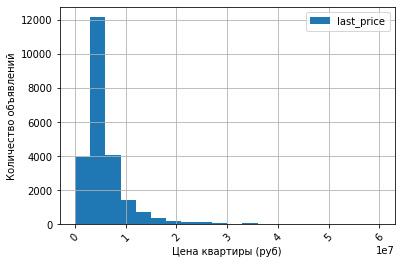

In [112]:
# колонка last_price
describe_hist(estate, 'last_price', 'Цена квартиры (руб)', describe=False, range_hist=(0, 6*10**7))

- Большинство предложений находятся на промежутке **до 20 млн рублей**.
- При этом **пик** предложений находится в районе **5 млн рублей**.

Для большей наглядности ограничим диапазон **10 млн** и посмотрим на самые популярные предложения:

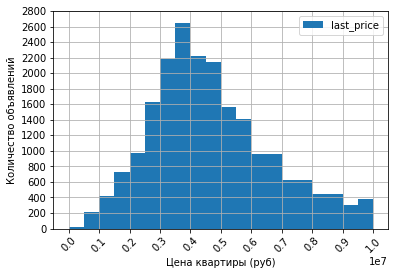

In [113]:
# колонка last_price
describe_hist(estate, 'last_price', 'Цена квартиры (руб)', describe=False, range_hist=(0, 10**7),
              xticks=[i*10**6 for i in range(11)], yticks=[i*200 for i in range(15)])

На более приближенной гистограмме видно, что **самые распространенные** предложения с ценами **от 2 до 7 млн**.

#### Колонка rooms

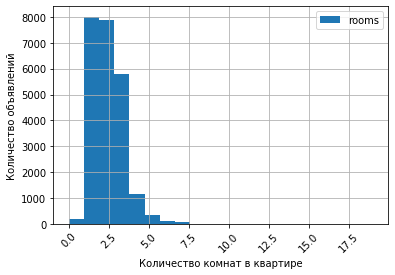

,rooms
count,23563.000000
mean,2.070662
std,1.078597
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


In [114]:
# колонка rooms
describe_hist(estate, 'rooms', 'Количество комнат в квартире')

- В основном продаются **стандартные** квартиры с количеством комнат **от 1 до 3**.  
- Квартиры с **0 комнат**: выше мы проверили, что это либо студия, либо открытая планировка.  
- Есть и максимум с **19 комнатами**, что выглядит слишком внушительно для простой квартиры. 

Сузим рассматриваемый диапазон до 8 комнат:

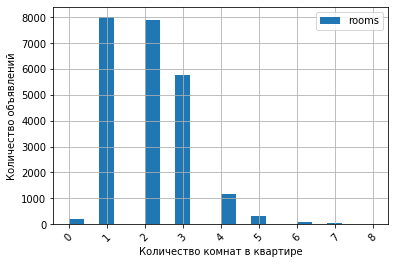

In [115]:
# колонка rooms
describe_hist(estate, 'rooms', 'Количество комнат в квартире', describe=False, range_hist=(0, 8))

- Самыми популярными предложениями являются **1 и 2 комнатные картиры**.
- Также достаточно много и объявлений с продажей **3 комнатных квартир**.
- Встречаются предложения по **4 и 5 комнатным квартирам**. Квартиры с большим количеством уже редкость.

Поскольку **количество комнат** величина дискретная, можно представить её на графике **barchart**, сгруппировав предложения по **количеству комнат**:

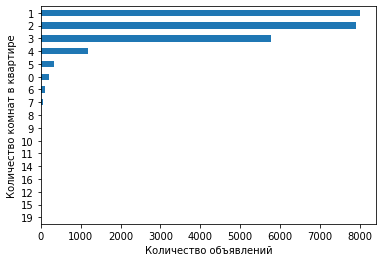

In [116]:
# представим его в горизонтальной форме
(estate
     .groupby('rooms')['last_price']
     .count()
     .sort_values()
     .plot(kind='barh')
)

plt.ylabel('Количество комнат в квартире')
plt.xlabel('Количество объявлений')
plt.show()

Получен упорядоченный результат, где видно, что на рынке больше всего предложений по **1, 2 и 3 комнатным** квартирам.

#### Колонка ceiling_height

На предыдущих шагах мы детально рассмотрели значение **высоты потолка** для датафрейма.  
Было обнаружено, что люди могут **совершать опечатку**: например, вместо 2.7 метров потолок 27 метров.  
Поскольку, в отличие от площади жилья, потолок в **квартирах** - достаточно похожий параметр, мы нашли наиболее реалистичные значения и сделали ими замену, учитывая **этажность дома**.  

Посмотрим, как выглядят гистограммы для исходных и обработанных данных:

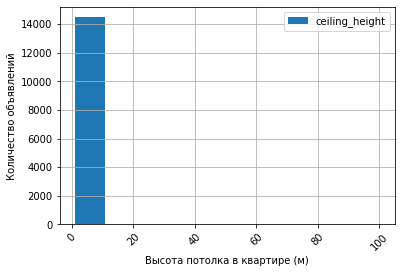

In [117]:
# estate_raw - исходные данные
describe_hist(estate_raw, 'ceiling_height', 'Высота потолка в квартире (м)', describe=False, bins=10)

Гистограмма по исходным данным не очень наглядна, но видно, что больше **10 метров** значения практически не встречаются.  
Ограничим значения **10 метрами**:

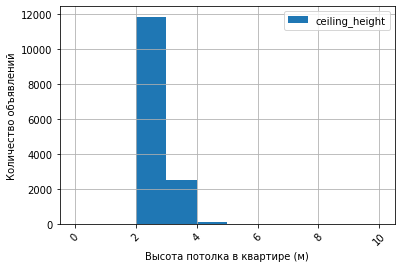

In [118]:
# estate_raw - исходные данные
describe_hist(estate_raw, 'ceiling_height', 'Высота потолка в квартире (м)', describe=False, bins=10, range_hist=(0, 10))

Даже при ограничении диапазона видим, что значения **меньше 2 метров** и **больше 5 метров** практически не встречаются. Значит, решение ограничить потолок **2 и 5 метрами** было правильным. Посмотрим на гистограмму для **обработанных данных**:

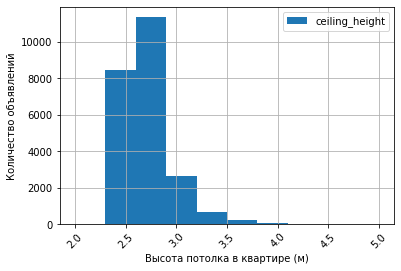

In [119]:
describe_hist(estate, 'ceiling_height', 'Высота потолка в квартире (м)', describe=False, bins=10)

В России **средняя высота** потолка варьируется от **2.5 до 2.7 метров**, **минимальная** норма **2.4 метра**.  
Видим, что больше всего объявлений с высотой потолков **от 2.3 до 2.8 метров**, что в целом согласуется с данными по России.  
При этом встречаются потолки **больше 3 метров** - это тоже адекватное значение. Такое значение характерно для квартир **более высокого класса**.

### 4.1. Вывод

Мы изучили распределение указанных параметров:

- **Колонка total_area**  
В основном продаются квартиры **со стандартными параметрами: от 30 до 90 метров**. Встречаются и значительные выбросы (например, 900 метров), но это может быть связано с опечаткой.


- **Колонка last_price**  
Большинство предложений находятся на промежутке **до 20 млн рублей**. Самые распространенные предложения варьируются в цене от **2 до 7 млн**.


- **Колонка rooms**  
Больше всего объявлений о продаже квартир со **стандартным** количеством комнат: **1, 2 и 3-комнатные квартиры**. Встречаются предложения с **4 и 5-комнатными квартирами**. Квартиры с большим количеством комнат уже редкость.


- **Колонка ceiling_height**  
В среднем **высота потолков** варьируется **от 2.3 до 2.8 метров**, что согласуется с данными по России. Встречаются потолки **выше 3 метров**, что характерно для жилья **более высокого класса**.

### 4.2. Изучение времени продажи квартиры

В данном пункте необходимо:
- Изучить, сколько времени обычно занимает **продажа квартиры**;
- Определить, когда можно считать, что продажи прошли очень **быстро**, а когда необычно **долго**.

На предыдущем этапе мы ознакомились с данными: около 13% квартир **не были убраны из объявлений**, т. е., возможно, не были проданы.  
Изучим время продажи квартир:

In [120]:
def describe_box(df_name, col_name, col_name_by=None, describe=True,
                 xlabel=None, ylabel=None, yticks=None, rot=None, figsize=(6, 4)):
    
    """Функция выводит боксплот и сводную статистику по указанной колонке:
    - df_name - наименование датафрейма
    - col_name - наименование колонки (в кавычках);
    - col_name_by - группирующая колонка (в кавычках);
    - describe (по умолчанию True) - нужно ли выводить сводную статистику;
    - xlabel - наименование оси X;
    - ylabel - наименование оси Y;
    - yticks - значения yticks;
    - rot - значение rot;
    - figsize - значение figsize."""
    
    df_name.boxplot(column=col_name, by=col_name_by, rot=rot, figsize=figsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yticks(yticks)
    plt.show()
    
    if describe:
        return df_name[[col_name]].describe()

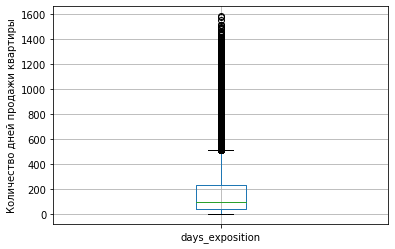

,days_exposition
count,20392.000000
mean,180.753040
std,219.740393
min,1.000000
25%,45.000000
50%,95.000000
75%,231.000000
max,1580.000000


In [121]:
# выведем сводную статистику
# построим боксплот
describe_box(estate, 'days_exposition', ylabel='Количество дней продажи квартиры')

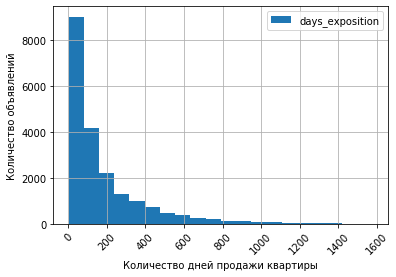

In [122]:
# построим гистограммy
describe_hist(estate, 'days_exposition', 'Количество дней продажи квартиры', describe=False)

- **Среднее** по продажам равно **180 дней**, а **медиана** - **95 дней**. 
- **Половина** всех объявлений висела на сервисе **от 45 до 231 дней**.
- **Четверть** всех объявлений была продана **менее чем за 44 дня**, а другая **четверть** объявлений - **болеее чем за 231 день**.
- Самый **максимальный результат** - это 1580 дней, т.е. **более  4 лет**.  
- **Минимальный результат** - это **1 день**. Возможно, квартира не была продана, а её сразу же сняли.

***Можно сказать, что в среднем квартиры продаются больше 1.5 месяца, но не больше года***.  

Изучим **быстрые продажами**. Здравый смысл подсказывает, что самая быстрая сделка может занять **не менее 5 дней**: размещение объявления, созвон покупателя и продавца, просмотр квартиры, обсуждение условий. Если сделка заняла **менее 5 дней** - это выглядит как **аномально быстрая продажа**. Повышается вероятность того, что это была не продажа, а объявление просто сняли с сайта.  

Построим гистограмму и боксплот по **быстрым продажи** (менее 45 дней):

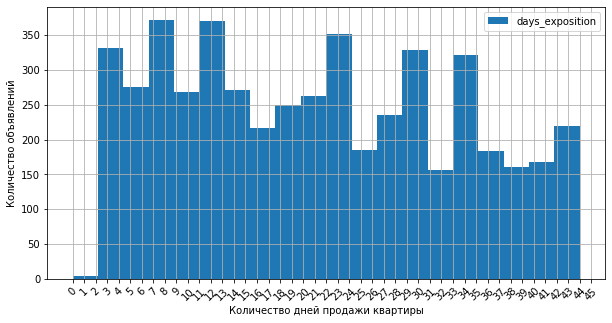

In [123]:
# построим гистограммy продаж до 45 дней
describe_hist(estate, 'days_exposition', 'Количество дней продажи квартиры', describe=False, range_hist=(0, 44),
              xticks=[i for i in range(46)], figsize=(10, 5))

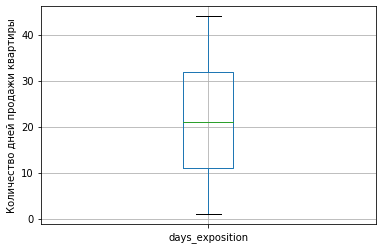

,days_exposition
count,5071.000000
mean,21.673832
std,12.283394
min,1.000000
25%,11.000000
50%,21.000000
75%,32.000000
max,44.000000


In [124]:
# построим боксплот по быстрым продажам до 45 дней
describe_box(estate.query('days_exposition < 45'), 'days_exposition', ylabel='Количество дней продажи квартиры')

- По **быстрым продажам до 45 дней** картина очень неоднородная. Квартира может быть куплена и за 12 дней, и за 44 дня.
- **Медиана** и **среднее** по быстрым продажам составляет **21 день**.
- **Четверть** продаж среди всех быстрых продаж была совершена менее чем **за 11 дней**.  


- На **гистограмме** очень маленькое количество объявлений для продаж **за 2 дня**. Но при этом встречаются продажи за 3, 4 и 5 дней.
- Значит, **аномально быстрая** продажа - это, скорее **не 5 дней** (потому что такие сроки встречаются), а **2 дня**. 

Остановимся на том, что **продажа менее 45 дней - это быстрая продажа** (исходя из наших данных).  
Но если продажа была совершена **менее, чем за 3 дня** - это выглядит как **аномально быстрая продажа**, которая, возможно, на самом деле и не была продажей.

Теперь изучим **долгие продажи**. Если объявление висит **более 2 лет** без продажи, возможно, в нём есть какие-то проблемы. Например, слишком завышенная стоимость или сложные условия передачи прав собственности.

Посмотрим на объявления, висящие дольше **500 дней** (в качестве границы взяли границу IQR):

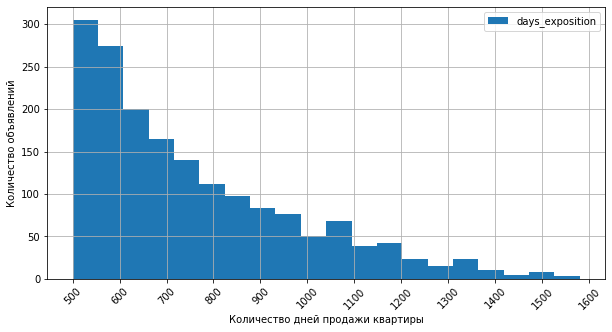

In [125]:
# построим гистограммy продаж от 500 дней
describe_hist(estate, 'days_exposition', 'Количество дней продажи квартиры', describe=False, range_hist=(500, 1580),
              xticks=[i*100 for i in range(5, 17)], figsize=(10, 5))

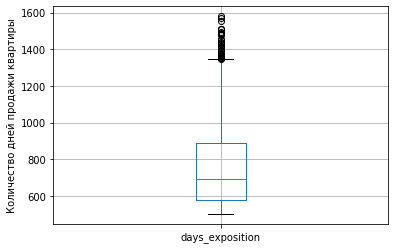

,days_exposition
count,1737.000000
mean,757.898100
std,223.716054
min,501.000000
25%,579.000000
50%,690.000000
75%,886.000000
max,1580.000000


In [126]:
# построим боксплот по долгим продажам более 500 дней
describe_box(estate.query('days_exposition > 500'), 'days_exposition', ylabel='Количество дней продажи квартиры')

- С **увеличением** количества дней постепенно **снижается** число **объявлений**.
- Из **"долгих"** объявлений 75% всех объявлений укладываются в срок **до 886 дней (2.5 года)**. 

Будем считать продажу **дольше обычного**, если количество дней **превышает 500 дней (1.3 года)** и **очень долгой** продажу **дольше 900 дней (2.4 года)**.

### 4.2. Вывод

- В среднем квартиры продаются **от 1.5 месяцев до 1 года**.
- Есть квартиры с **быстрой** продажей **менее чем за 1.5 месяца**. Но если продажа была совершена менее, чем за **3 дня**, есть повод задуматься, состоялась ли продажа на самом деле.
- Квартира продается **дольше обычного**, если срок продажи превышает **500 дней (1.3 года)**. При этом продажу можно назвать **очень долгой**, если объявление висело на сервисе **больше 2.4 лет**. 

### 4.3. Изучение зависимости цены от выбранных параметров

Необходимо изучить, как связана стоимость квартиры со следующими параметрами:
- общая площадь квартиры;
- число комнат;
- удалённость от центра;

А также:
- категория этажа (первый, последний, другой этаж);
- дата размещения (день недели, месяц, год).

Для ознакомления с данными построим матрицу с корреляциями по указанным параметрам:

In [127]:
# расчет коэффициента корреляции
estate[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.653626,0.363184,-0.205769
total_area,0.653626,1.000000,0.758723,-0.230461
rooms,0.363184,0.758723,1.000000,-0.184002
cityCenters_nearest,-0.205769,-0.230461,-0.184002,1.000000


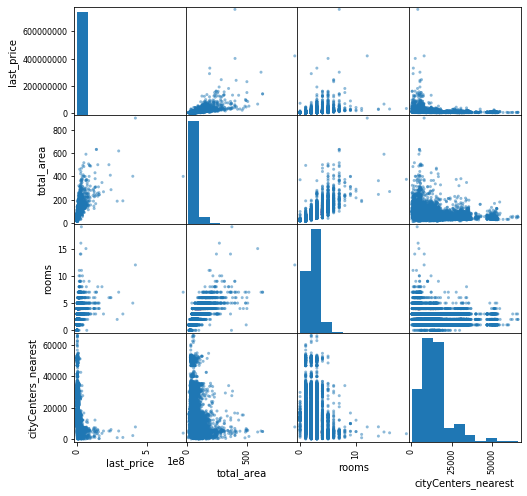

In [128]:
# визуализация матрицы с корреляциями
pd.plotting.scatter_matrix(estate[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(8, 8))
plt.show()

- На первый взгляд кажется, что из всех выбранных параметров сильнее всего **цена** взаимосвязана с **метаражом** квартиры (корреляция 0.65).
- Между **ценой** и **расстоянием до центра** наблюдается не очень ярко выраженная, но **отрицательная** взаимосвязь. То есть, чем дальше от центра, тем меньше стоимость квартиры, что кажется разумным.

Сопоставим **цену** отдельно с каждой переменной и проверим данные на предмет выбивающихся значений.

In [129]:
def corr_scatter(df_name, col_name_x, xlabel, col_name_y='last_price', ylabel='Цена квартиры (руб)', xticks=None, yticks=None):
    
    """Функция выводит диаграмму рассеяния и матрицу корреляций для указанных колонок:
    - df_name - наименование датафрейма;
    - col_name_x - наименование колонки (ось Х);
    - col_name_y (по умолчанию 'last_price') - наименование колонки (ось Y);
    - xlabel - наименование оси Х;
    - ylabel (по умолчанию 'Цена квартиры (руб)') - наименование оси Y;
    - xticks - значения xticks;
    - yticks - значения yticks."""

    # построение scatter plot
    df_name.plot(x = col_name_x, y = col_name_y, marker='.', linestyle='none', alpha=0.2, grid=True)    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(xticks)
    plt.yticks(yticks)
    plt.show()
    
    # расчет коэффициента корреляции
    return df_name[[col_name_x, col_name_y]].corr()

### Сопоставление стоимости и квадратного метра

Сопоставим значения *last_price* и *total_area*:

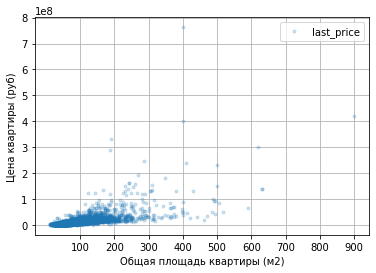

,total_area,last_price
total_area,1.000000,0.653626
last_price,0.653626,1.000000


In [130]:
# колонка total_area
corr_scatter(estate, 'total_area', 'Общая площадь квартиры (м2)', xticks=np.arange(100, 901, 100))

- **Коэффициент корреляции 0.65** - это говорит о наличии положительной взаимосвязи цены и метража.  
- Предложений с ценой выше **200 млн** очень мало. Также довольно **мало** предложений, где **метраж** превышал бы **500 м2**. 

Посмотрим, сколько всего предложений с ценой **200 млн и более либо метражом 500 м**:

In [131]:
print('Предложение с ценой более 200 млн руб либо площадью более 500 м2:', len(estate.query('last_price >= 200000000 or total_area >= 500')))

Предложение с ценой более 200 млн руб либо площадью более 500 м2: 15


Уберем эти значения из рабочего датафрейма:

In [132]:
print('Количество наблюдений ДО:', len(estate))

# убираем указанные выше значения
estate = estate.query('last_price < 200000000 and total_area < 500')

print('Количество наблюдений ПОСЛЕ:', len(estate))

Количество наблюдений ДО: 23563
Количество наблюдений ПОСЛЕ: 23548


Посмотрим, как изменилась корреляция после исключения выдающихся значений:

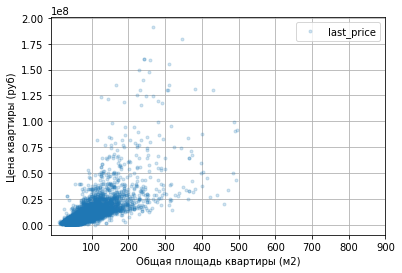

,total_area,last_price
total_area,1.000000,0.729515
last_price,0.729515,1.000000


In [133]:
# колонка total_area
corr_scatter(estate, 'total_area', 'Общая площадь квартиры (м2)', xticks=np.arange(100, 901, 100))

Значение **коэффициента корреляции выросло до 0.73**. Однако всё равно с увеличением площади связь между стоимостью и площадью уже не такая однозначная.

### Сопоставление стоимости и числа комнат

Поскольку **количество комнат** - это категориальная переменная, посмотрим на варьирование цен на боксплоте и выведем дополнительно боксплоты по **площади**:

In [134]:
# количество предложений по количеству комнат
estate['rooms'].value_counts()

1     8003
2     7896
3     5777
4     1171
5      323
0      194
6      101
7       54
8       12
9        8
10       3
14       2
11       2
19       1
16       1
Name: rooms, dtype: int64

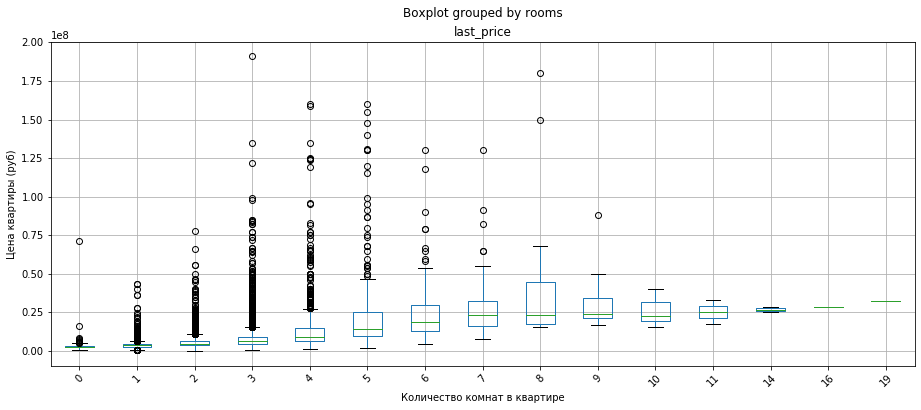

In [135]:
# боксплоты по rooms
describe_box(estate, 'last_price', 'rooms', describe=False,
             xlabel='Количество комнат в квартире', ylabel='Цена квартиры (руб)',
             rot = 45, figsize=(15, 6))

- С увеличением **комнат** постепенно растёт **цена**. Но всё-таки взаимосвязь **цены** с **площадью** более показательна. И это объяснимо: **маленький** метраж можно разбить на **большое** количество комнат, но вряд ли это кардинально повлияет на цену.
- Поскольку наблюдений по квартирам с **более чем 10 комнатами** очень **мало** и они показывают противоречивые результаты, исключим их из рабочего датафрейма.

In [136]:
print('Количество предложений, где 10 комнат и более:', len(estate.query('rooms >= 10')))
print('Количество наблюдений ДО:', len(estate))

# оставляем 7 комнат и меньше
estate = estate.query('rooms <= 9')

print('Количество наблюдений ПОСЛЕ:', len(estate))

Количество предложений, где 10 комнат и более: 9
Количество наблюдений ДО: 23548
Количество наблюдений ПОСЛЕ: 23539


### Сопоставление стоимости и удаленности от центра

Перед анализом вспомним, что из **328 пунктов** в объявлениях имеется информация только **по 25 пунктам**. Это **около 8%** всех локаций. Поэтому полученный ниже результат будет отражать неполную картину.

Сопоставим значения *last_price* и *cityCenters_nearest*:

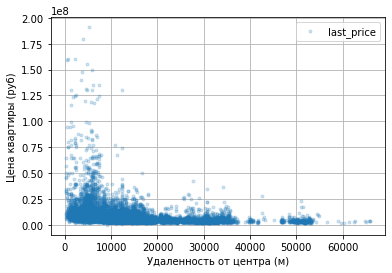

,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,-0.267003
last_price,-0.267003,1.000000


In [137]:
# колонка total_area
corr_scatter(estate, 'cityCenters_nearest', 'Удаленность от центра (м)')

- После исключения выдающихся значений **коэффициент корреляции** по модулю вырос до **0.27**.
- **Отрицательное** значение говорит о наличии **обратной зависимости** между **расстоянием до центра** и **ценой**. То есть, чем **дальше** расстояние от центра, тем **меньше** цена. Однако эта зависимость не так очевидна, как в предыдущих пунктах.  

Возможно, при сравнении нужно учитывать ещё и **населенный пункт**. Возьмём самый популярный город в объявлениях - **Санкт-Петербург**:

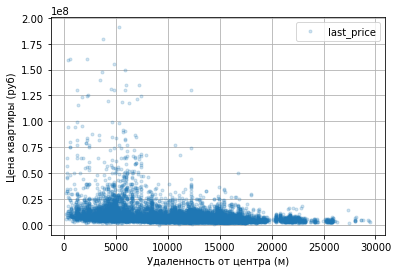

,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,-0.332172
last_price,-0.332172,1.000000


In [138]:
# колонка total_area
corr_scatter(estate.query('locality_name_changed == "санкт-петербург"'),
             'cityCenters_nearest', 'Удаленность от центра (м)')

- Коэффициент корреляци немного **вырос** и достиг **значения 0.33**. 
- Таким образом, цена имеет, скорее, **обратную зависимость** от удалённости от центра, т.е. чем дальше от центра, тем ниже цены.
- Но показатель **корреляции** для этих переменных **меньше**, чем при сравнении **цены** и **площади**.

### Сопоставление цены и этажа

Сопоставим значения *last_price* и *floor_group*:

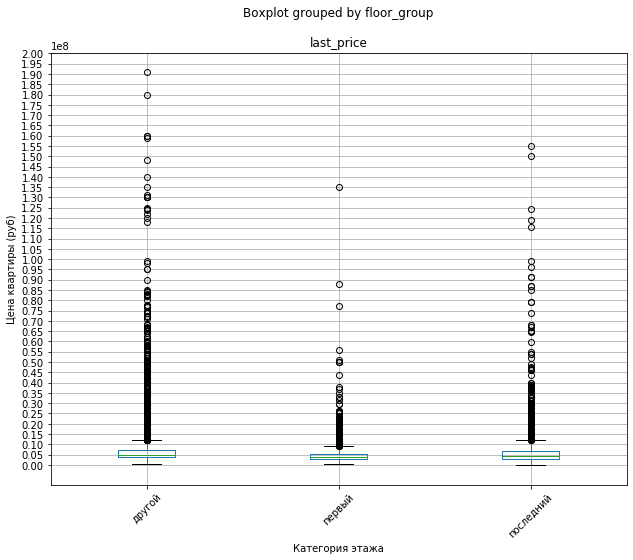

In [139]:
# боксплоты по floor_group
describe_box(estate, 'last_price', 'floor_group', describe=False,
             xlabel='Категория этажа', ylabel='Цена квартиры (руб)',
             rot = 45, figsize=(10, 8), yticks=[i*5000000 for i in range(41)])

Из-за большого количества выбросов на таком боксплоте практически ничего не видно.  
Посмотрим отдельно квартиры со стоимостью **менее 15 млн** и **15 млн и более рублей** (приблизительное значение IQR):

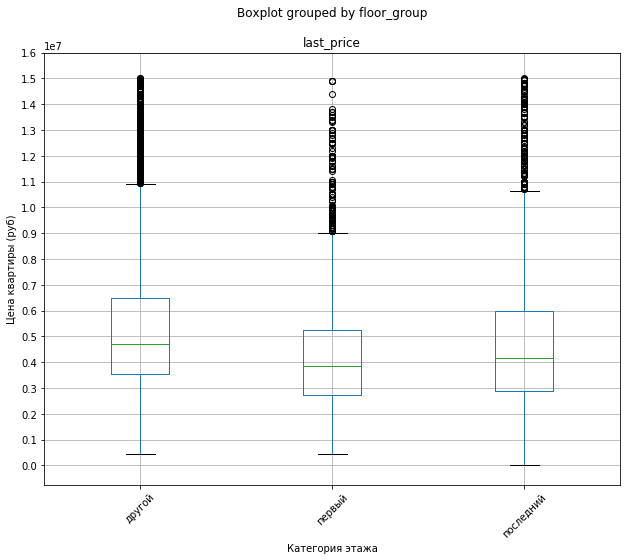

In [140]:
# стоимость менее 15 млн
describe_box(estate.query('last_price < 15000000'), 'last_price', 'floor_group', describe=False,
             xlabel='Категория этажа', ylabel='Цена квартиры (руб)',
             rot = 45, figsize=(10, 8), yticks=[i*1000000 for i in range(17)])

- В целом **первый этаж** можно назвать **менее привлекательным**, чем остальные этажи.
- **Последний** этаж тоже немного ниже, чем **остальные** этажи, но он имеет **больший размах**, чем **первый**.

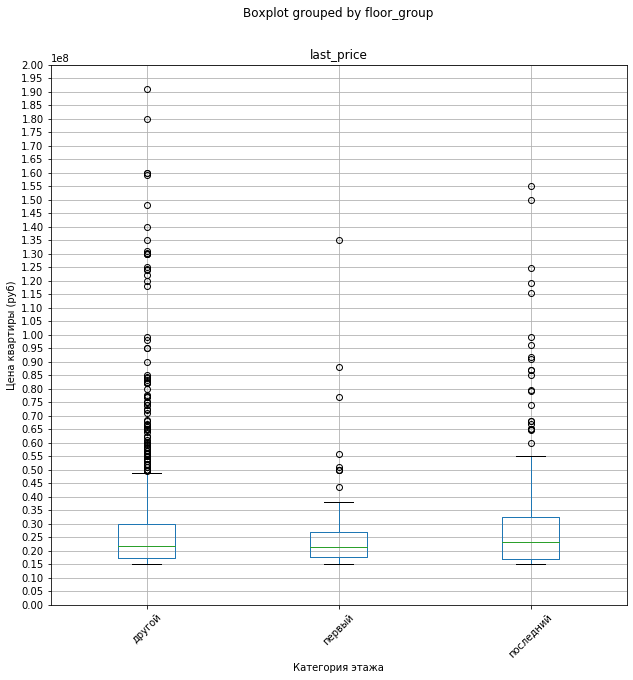

In [141]:
# стоимость 15 млн и более
describe_box(estate.query('last_price >= 15000000'), 'last_price', 'floor_group', describe=False,
             xlabel='Категория этажа', ylabel='Цена квартиры (руб)',
             rot = 45, figsize=(10, 10), yticks=[i*5000000 for i in range(41)])

- Для **квартир** со стоимостью **более 15 млн** **первый этаж** тоже выглядит немного менее предпочтительным, чем другие этажи. - **Последний** этаж также имеет самый широкий размах, но уже нельзя сказать, что он менее привлекателен, чем другие этажи.

Рассмотрев **три категории** по этажам, можно сказать, что в выборке **первые этажи** в среднем стоят **немного дешевле**, чем квартиры с другой этажностью.

### Сопоставление цены и дня недели, месяца, года

Начнем с **года**. Сначала проверим **количество месяцев** в каждом годе, т. к., возможно, данные по некоторым годам **неполные**:

In [142]:
# функция для проверки количества уникальных значений месяцев в году
def check_number_months(year_list):
    """Функция принимает список с годами и проверяет количество месяцев в каждом из них."""
    for year_check in year_list:
        print('Количество месяцев в', year_check, 'году:', end=' ')
        print(estate.query('year_exposition == @year_check')['month_exposition'].nunique())

check_number_months(list(range(2014, 2020)))

Количество месяцев в 2014 году: 2
Количество месяцев в 2015 году: 12
Количество месяцев в 2016 году: 12
Количество месяцев в 2017 году: 12
Количество месяцев в 2018 году: 12
Количество месяцев в 2019 году: 5


Отсутствуют данные за полный год **по 2014 и 2019 году**. Поэтому будет не совсем корректно говорить об абсолютных значениях по дням недели и месяцам, не исключив этих значений. Посмотрим, что будет, если сопоставить **количество объявлений** по годам:

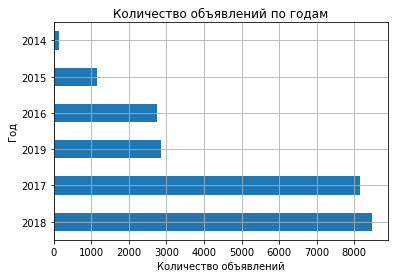

In [143]:
# построим barchart
(estate['year_exposition']
     .value_counts(ascending=False)
     .plot(kind='barh', grid=True)
)

plt.title('Количество объявлений по годам')
plt.xlabel('Количество объявлений')
plt.ylabel('Год')

plt.show()

- **Меньше всего** объявлений было опубликовано за **неполный 2014 год**.
- Далее наблюдается **постепенный рост** количества публикуемых объявлений.
- По **2019** нет возможности провести оценку, потому что год тоже не полный.  

Несмотря на такое различие, мы можем провести оценку **относительных** показателей и построить **боксплот** для оценки **средних (медианных) цен** в публикуемых объявлениях по **годам**:

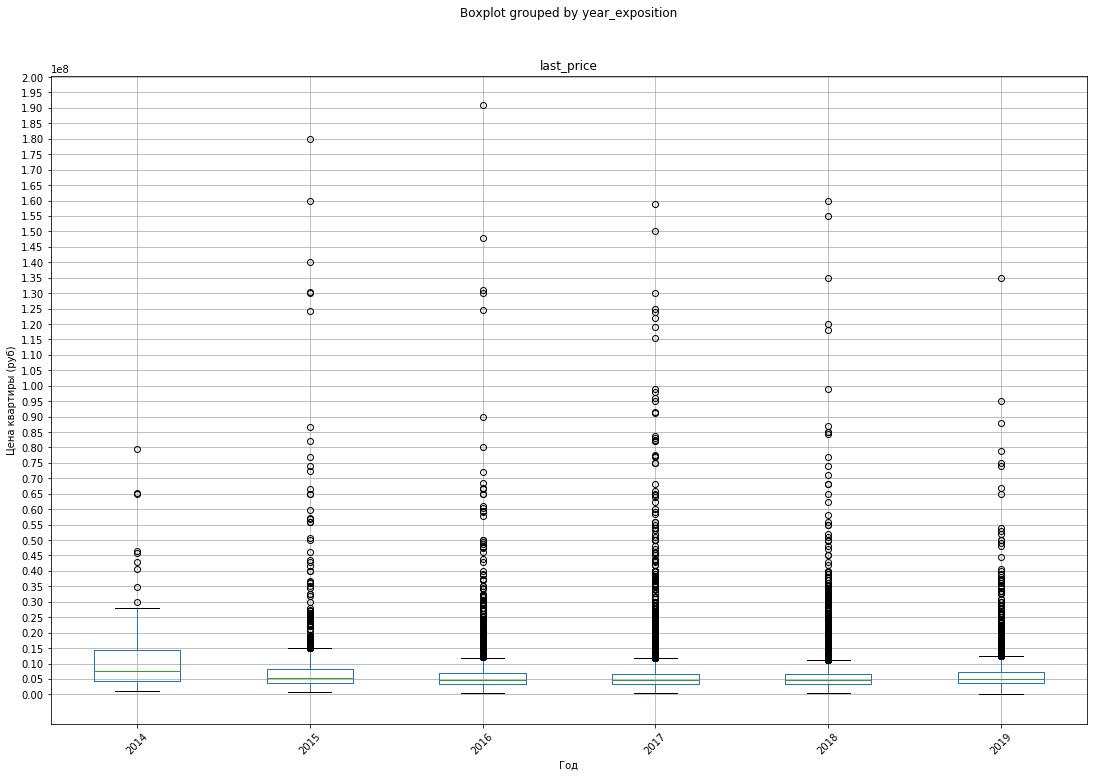

In [144]:
describe_box(estate, 'last_price', col_name_by='year_exposition', describe=False,
                 xlabel='Год', ylabel='Цена квартиры (руб)', yticks=[i*5000000 for i in range(41)], rot=45, figsize=(18, 12))

Боксплоты получились не очень наглядными, поэтому **снизим** рассматриваемый диапазон:

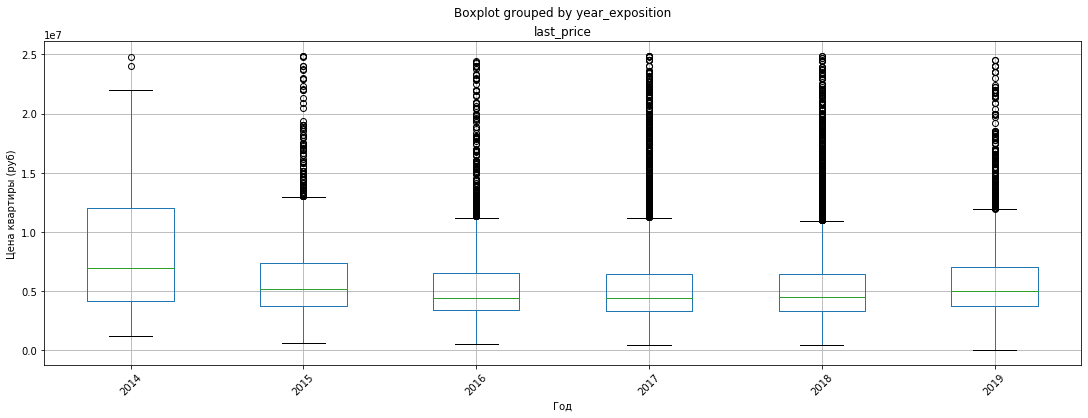

In [145]:
# рассмотрим цены до 25 млн рублей
describe_box(estate.query('last_price < 25000000'), 'last_price', col_name_by='year_exposition', describe=False,
                 xlabel='Год', ylabel='Цена квартиры (руб)', yticks=[i*5000000 for i in range(6)], rot=45, figsize=(18, 6))

- Из года в год **порядок цен** приблизительно одинаковый.
- **Наибольший размах** цен и самая большая **медиана** в **2014 году**. Но стоит учесть, что в этот год было меньше всего объявлений.
- Далее в **2015** году **средние цены** незначительно **снижаются**.
- В **2016-2018** остаются относительно **стабильными**.
- Начиная с **2019 года** есть тенденция к **увеличению** средних цен.

Теперь перейдем к **месяцам**:

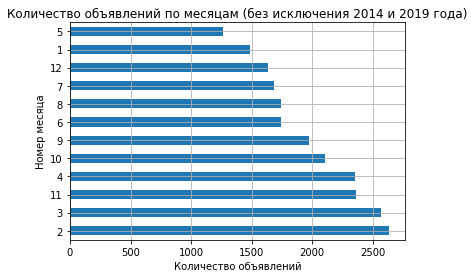

In [146]:
# построим barchart НЕ исключая 2014 и 2019
(estate['month_exposition']
     .value_counts(ascending=False)
     .plot(kind='barh', grid=True)
)

plt.title('Количество объявлений по месяцам (без исключения 2014 и 2019 года)')
plt.xlabel('Количество объявлений')
plt.ylabel('Номер месяца')

plt.show()

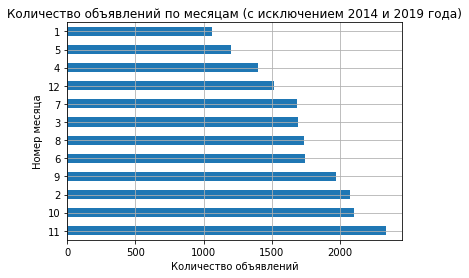

In [147]:
# построим barchart исключая 2014 и 2019
(estate
     .query('2014 < year_exposition < 2019')['month_exposition']
     .value_counts(ascending=False)
     .plot(kind='barh', grid=True)
)

plt.title('Количество объявлений по месяцам (с исключением 2014 и 2019 года)')
plt.xlabel('Количество объявлений')
plt.ylabel('Номер месяца')

plt.show()

- В обоих случаях видим, что **меньше всего** объявлений публиковалось в **мае** и **январе**.
- Возможно, из-за того, что в эти месяцы **много праздничных дней**.
- **Больше всего** объявлений относительно других месяцев публиковалось в конце года в **октябре** и **ноябре**.

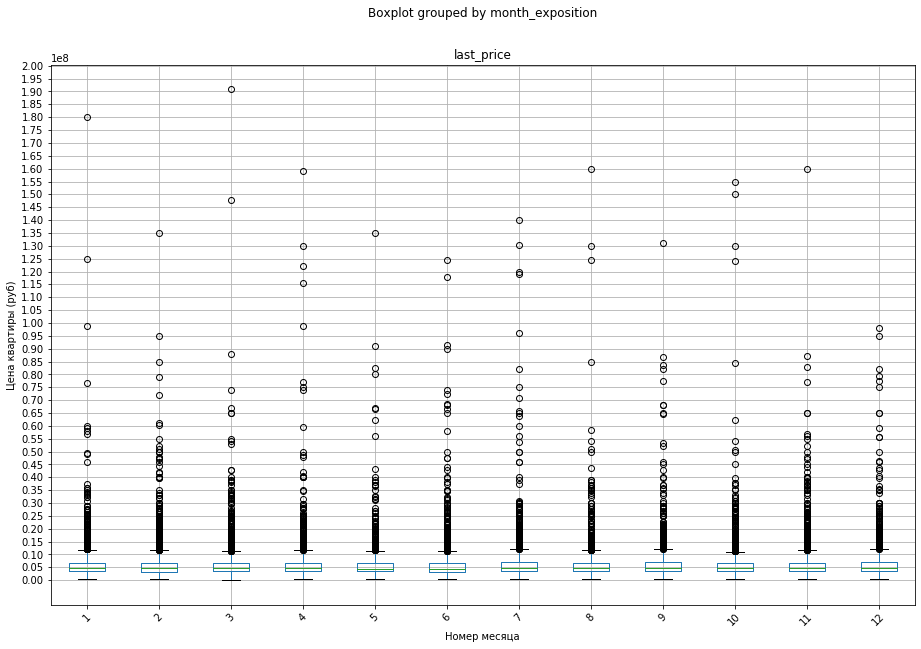

In [148]:
describe_box(estate, 'last_price', col_name_by='month_exposition', describe=False,
             xlabel='Номер месяца', ylabel='Цена квартиры (руб)',
             yticks=[i*5000000 for i in range(41)], rot=45, figsize=(15, 10))

Боксплоты получились не очень наглядными, поэтому **снизим** рассматриваемый диапазон:

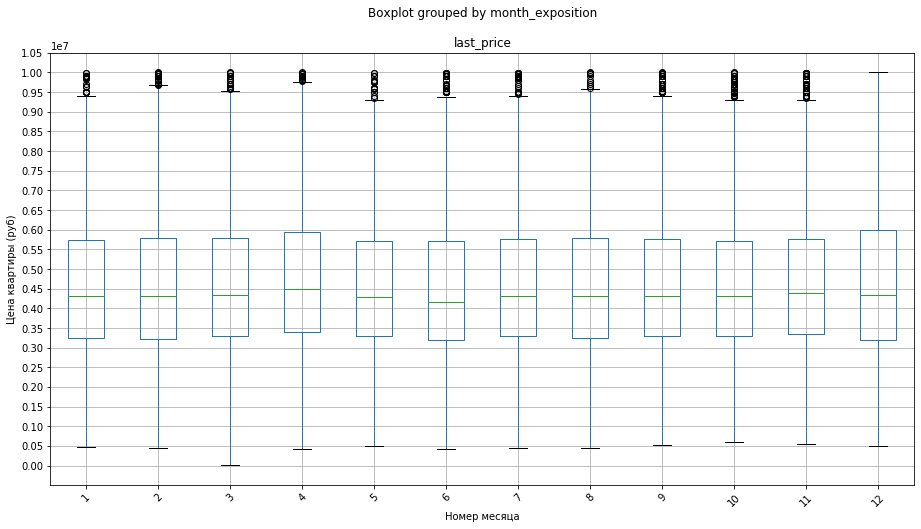

In [149]:
describe_box(estate.query('last_price < 10000000'), 'last_price', col_name_by='month_exposition', describe=False,
             xlabel='Номер месяца', ylabel='Цена квартиры (руб)',
             yticks=[i*500000 for i in range(22)], rot=45, figsize=(15, 8))

- Боксплоты по **месяцам** тоже достаточно похожи, поэтому однозначно сказать, что в какие-то месяца выкладывались более дешевые или более дорогие предложения затруднительно.  
- Визуально немного выделяется в **большую** сторону **апрель** - медиана несколько больше, чем в других месяцах. 
- Чуть ниже среднего **медиана** по **июню**.
- В **декабре** самый широкий размах по предложениям.

Рассмотрим **дни недели**.  
Посмотрим, в какие **дни недели** чаще всего **публиковались** объявления:

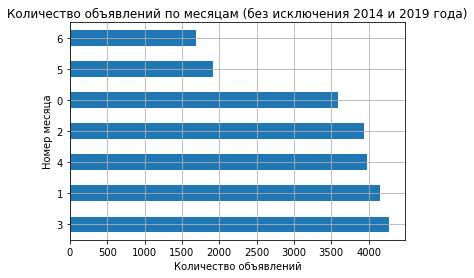

In [150]:
# построим barchart НЕ исключая 2014 и 2019
(estate['weekday_exposition']
     .value_counts(ascending=False)
     .plot(kind='barh', grid=True)
)

plt.title('Количество объявлений по месяцам (без исключения 2014 и 2019 года)')
plt.xlabel('Количество объявлений')
plt.ylabel('Номер месяца')

plt.show()

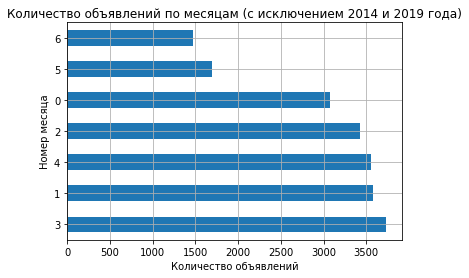

In [151]:
# построим barchart исключая 2014 и 2019
(estate
     .query('2014 < year_exposition < 2019')['weekday_exposition']
     .value_counts(ascending=False)
     .plot(kind='barh', grid=True)
)

plt.title('Количество объявлений по месяцам (с исключением 2014 и 2019 года)')

plt.xlabel('Количество объявлений')
plt.ylabel('Номер месяца')

plt.show()

- В обоих случаях объявления **реже всего** публиковались в **выходные дни** (почти в 2 раза меньше, чем в будний день).
- **Чаще всего** публикации происходили во **вторник** либо **четверг**.

Теперь посмотрим на **стоимость** квартир в зависимости от **дней недели**:

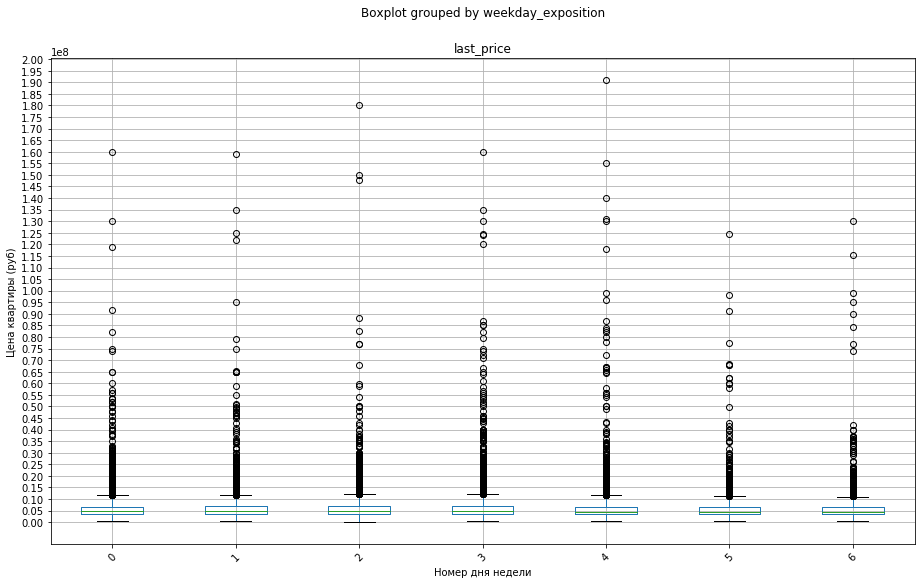

In [152]:
describe_box(estate, 'last_price', col_name_by='weekday_exposition', describe=False,
             xlabel='Номер дня недели', ylabel='Цена квартиры (руб)',
             yticks=[i*5000000 for i in range(41)], rot=45, figsize=(15, 9))

Боксплоты получились не очень наглядными, поэтому **снизим** рассматриваемый диапазон:

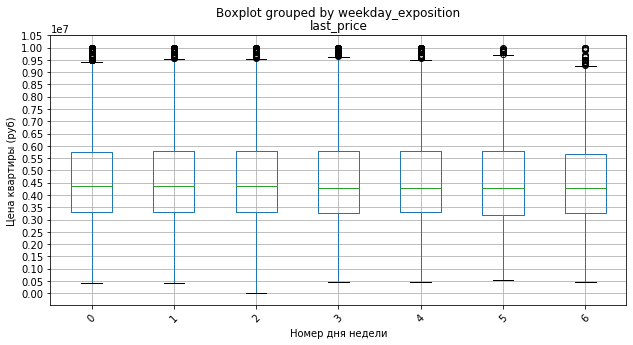

In [153]:
# рассмотрим цены до 10 млн рублей
describe_box(estate.query('last_price < 10000000'), 'last_price', col_name_by='weekday_exposition', describe=False,
             xlabel='Номер дня недели', ylabel='Цена квартиры (руб)',
             yticks=[i*500000 for i in range(22)], rot=45, figsize=(10, 5))

В целом все дни недели достаточно похожи.

Таким образом, каких-либо **сильно выдающихся** закономерностей по **временным промежуткам** не было обнаружено.  
Но можно отметить некоторые особенности по **годам** и **месяцам**:
- В **2014** году средние цены были **выше**, чем в последующие годы.
- В **апреле** в среднем цены несколько выше, а в **июне** цены в публикуемых предложениях **ниже**, чем в остальные месяца.  
- Интересным показалось наблюдение по **количеству объявлений**: люди **реже** публикуют объявления **в праздничные месяца** и **выходные**.

### 4.3. Вывод

Мы изучили взаимосвязь цены с указанными параметрами:
- На **цену** квартиры очень сильно влияет её **общая площадь**. С большой вероятностью, чем **больше** площадь, тем **выше** цена. Однако для **очень больших площадей** (более 200 м2) связь уже не такая однозначная.
- Прослеживается положительная связь **цены** с количеством **комнат**. Однако определяющим фактором все равно является **площадь** (на количество комнат можно повлиять изменением планировки).
- Существует **обратная** взаимосвязь между **ценой** и **расстоянием до центра**. То есть, чем дальше от центра, тем ниже цена. Однако показатель корреляции между этими переменными не такой явный, как между **ценой** и **площадью** и даже **количеством комнат**.
- При сопоставлении с категорией этажей (первый, последний, другой) обнаружено, что выборочная стоимость квартир на **первом** этаже несколько **ниже**, чем на других этажах.
- При работе с **временными отрезками** обнаружено, что у нас имеются **неполные** данные за **2014** и **2019** год. Тем не менее, были обнаружены интересные закономерности по **абсолютным** показателям. Так, люди **реже** публикуют объявления в **выходные дни** (суббота, воскресенье) и **праздничные месяцы**.   
Что касается средних показателей, обнаружено, что в **2014 году** цены были несколько **выше**, чем в последующие годы; в **апреле** цены немного **выше**, а в **июне** - **ниже**, чем в остальные месяца.

## Шаг 5. Изучение средней цены квадратного метра в топ-10 населённых пунктах

Необходимо выбрать 10 населённых пунктов с наибольшим числом объявлений и сравнить среднюю цену квадратного метра в этих населённых пунктах. 

Во время предобработки данных мы уже выводили **топ-10**:

In [154]:
# выведем 10 локаций с наибольшим количеством объявлений
print(estate['locality_name_changed'].value_counts().head(10))

санкт-петербург      15625
мурино                 586
кудрово                470
поселок шушары         439
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
выборг                 237
Name: locality_name_changed, dtype: int64


Составим из них **топ-10 список** и выведем для этих названий **среднее** и **медиану**, чтобы выделить пункты с самой **высокой** и **низкой** стоимостью жилья:

In [155]:
# список с топ-10 названиями
top10_list = ['санкт-петербург', 'мурино', 'кудрово', 'поселок шушары', 'всеволожск', 'пушкин', 'колпино', 'поселок парголово', 'гатчина', 'выборг']

# создание среза
top10_slice = estate[estate['locality_name_changed'].isin(top10_list)][['locality_name_changed', 'rub_per_m2']]

# вывод среднего, медианы и количества объявлений
top10_slice_pivot = (top10_slice
                     .pivot_table(index='locality_name_changed', values='rub_per_m2', aggfunc = ['mean', 'median', 'count'])
                     .sort_values(by=('mean', 'rub_per_m2'), ascending=False))

# переименуем колонки
top10_slice_pivot.columns = ['mean_rpm2', 'median_rpm2', 'count_rpm2']
top10_slice_pivot

,mean_rpm2,median_rpm2,count_rpm2
locality_name_changed,,,
санкт-петербург,114337.070628,104761.904762,15625
пушкин,103125.819291,100000.000000,369
кудрово,95260.846171,95555.311677,470
поселок парголово,90175.913458,91642.857143,327
мурино,86041.116064,86250.377687,586
поселок шушары,78551.344545,76829.268293,439
колпино,75424.579098,74723.748474,338
гатчина,68746.146763,67796.610169,307
всеволожск,68654.473986,65789.473684,398


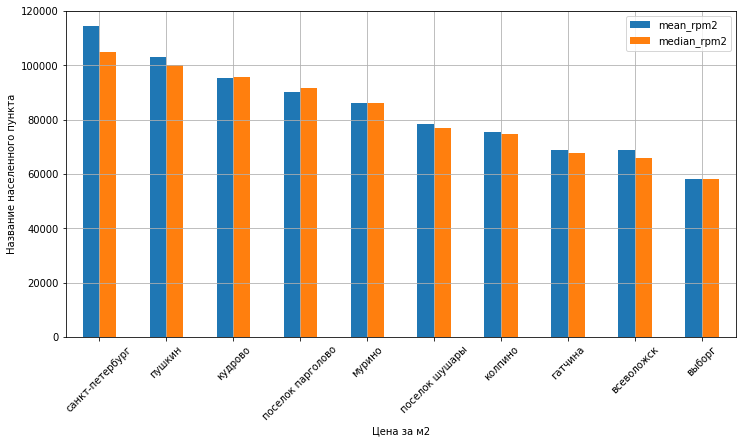

In [156]:
# визуализируем результат по среднему и медиане
top10_slice_pivot[['mean_rpm2', 'median_rpm2']].plot(kind='bar', figsize=(12, 6), rot=45, grid=True)

plt.xlabel('Цена за м2')
plt.ylabel('Название населенного пункта')
plt.show()

- В двух локациях **средняя цена за квадратный метр** превышает **100 тыс.рублей**.
- Выше всего средняя цена в **Санкт-Петербурге**, что вполне объяснимо, т. к. это центр.
- На втором месте находится **Пушкин** (бывшее Царское Село). **Пушкин** располагается довольно близко к **Санкт-Петербургу** и считается крупным туристическим, научным, учебным и военно-промышленным центром, что отражается на стоимости недвижимости.  
- На последнем месте в топе располагается **Выборг** со средней стоимостью за метр **менее 60 тыс.рублей**. Из всего топа этот город расположен **дальше всех** от Санкт-Петербурга и является небольшим городом с населением **менее 100 тысяч**. Также можно отметить, что этот город занимает окраинное положение.

Посмотрим на цены за м2 для **всех локаций**:

In [157]:
# вывод среднего, медианы и количества объявлений
all_first_top10 = (estate[['locality_name_changed', 'rub_per_m2']]
                     .pivot_table(index='locality_name_changed', values='rub_per_m2', aggfunc = ['mean', 'median', 'count'])
                     .sort_values(by=('mean', 'rub_per_m2'), ascending=False))

all_first_top10.sort_values(by=('mean', 'rub_per_m2'), ascending=False).head(10)

,mean,median,count
,rub_per_m2,rub_per_m2,rub_per_m2
locality_name_changed,,,
зеленогорск,115122.799198,101666.666667,24
санкт-петербург,114337.070628,104761.904762,15625
поселок репино,104238.614786,86542.207792,4
пушкин,103125.819291,100000.000000,369
сестрорецк,101757.616875,99678.456592,183
поселок лисий нос,100660.814239,74525.745257,3
деревня мистолово,98549.976709,90888.888889,11
поселок левашово,96997.690531,96997.690531,1


- Если выбрать **все локации**, то в топ по стоимости попадает **Зеленогорск**. Этот город расположен недалеко от Санкт-Петербурга и считается **курортным**.
- То же можно сказать и про поселок **Репино** - это тоже **курортное место**. Хотя если обратить внимание на **медиану**, то значение цены не превышает 100 тысяч. Однако этих предложений довольно мало, поэтому говорить о том, что они однозначно входят в топ не стоит.

In [158]:
# информация по топу с самыми дешевыми ценами
all_last_top10 = all_first_top10.sort_values(by=('mean', 'rub_per_m2'))
all_last_top10.head(10)

,mean,median,count
,rub_per_m2,rub_per_m2,rub_per_m2
locality_name_changed,,,
деревня старополье,11206.221198,11000.000000,3
поселок станции свирь,11481.481481,11481.481481,2
деревня вахнова кара,11688.311688,11688.311688,1
деревня выскатка,12335.480902,12335.480902,2
поселок совхозный,12629.129129,12629.129129,2
деревня малая романовка,12724.550898,12724.550898,1
поселок тесово-4,12931.034483,12931.034483,1
деревня сижно,13709.677419,13709.677419,1


В **топ** с самыми **низкими** ценами входят в основном **поселки** и **деревни** с единичными предложениями. Проверив местоположение нескольких деревень, видно, что это очень **маленькие** локации, которые достаточно сильно удалены от крупных городов и **Санкт-Петербурга** в частности. Можно предположить, что речь идёт о старых домах без удобств, что может непосредственно отражаться на цене.

## Шаг 5. Вывод

- В **топ-10** мы изучили **среднюю стоимость за квадратный метр**: на первом месте оказался **Санкт-Петербург** - Северная столица России, второй по численности город России.
- Последнее место в топе занимает **Выборг**, что можно объяснить малой численностью населения, удаленностью от Санкт-Петербурга и окраинным положением.  
- Если посмотреть на картину в целом, то в **топ** по **высокой** стоимости попадают в т. ч. и **курортные** локации.
- В **топ** по **низкой** стоимости попадают маленькие, удаленные от центра деревни.

## Шаг 6. Выделение центральной области в Санкт-Петербурге

Зная расстояние до центра, необходимо:
- Выделить область, входящую в **центр**;
- Изучить, взаимосвязь **цены** и удалённости от центра.

Создадим столбец с расстоянием до центра в километрах - *cityCenters_nearest_km*:

In [159]:
# проверка пропусков ДО и ПОСЛЕ - должно быть одинаково
print('Количество пропусков ДО:', len(estate[estate['cityCenters_nearest'].isnull()]))

# перевод к км и округление
estate['cityCenters_nearest_km'] =  estate['cityCenters_nearest'] / 1000
estate['cityCenters_nearest_km'] = (estate['cityCenters_nearest_km']
                                            .fillna(-1)
                                            .apply(round)
                                            .replace(-1, np.nan))

print('Количество пропусков ПОСЛЕ:', len(estate[estate['cityCenters_nearest'].isnull()]))

estate[['cityCenters_nearest', 'cityCenters_nearest_km']].head()

Количество пропусков ДО: 5432
Количество пропусков ПОСЛЕ: 5432


,cityCenters_nearest,cityCenters_nearest_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,6800.0,7.0
4,8098.0,8.0


Для удобства сделаем отдельный срез по **Санкт-Петербургу**:

In [160]:
estate_spb = estate.query('locality_name_changed == "санкт-петербург"')
estate_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_name_changed,rub_per_m2,year_exposition,month_exposition,weekday_exposition,floor_group,living_vs_total,kitchen_vs_total,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,NaN,санкт-петербург,120370.370370,2019,3,3,другой,0.472222,0.231481,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,558.0,санкт-петербург,92785.714286,2015,8,3,другой,0.612500,0.148214,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,NaN,9,False,...,424.0,санкт-петербург,408176.100629,2015,7,4,другой,NaN,NaN,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121.0,санкт-петербург,100000.000000,2018,6,1,другой,0.320000,0.410000,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.75,24,NaN,22,False,...,NaN,санкт-петербург,110544.692737,2019,4,3,другой,NaN,0.263966,12.0


Какое максимальное расстояние может быть до центра в самом Санкт-Петербурге? Посмотрим на значения **расстояния до центра в км**. В качестве значений для сопоставления выберем **цену за м2**:

In [161]:
# посмотрим на 'mean', 'median', 'count'
estate_spb_pivot = (estate_spb
                     .pivot_table(index='cityCenters_nearest_km', values='rub_per_m2', aggfunc = ['mean', 'median', 'count']))

estate_spb_pivot.columns = ['rpm2_mean', 'rpm2_median', 'rpm2_count']
estate_spb_pivot

,rpm2_mean,rpm2_median,rpm2_count
cityCenters_nearest_km,,,
0.0,245833.530289,172619.047619,27
1.0,161563.893717,127731.092437,189
2.0,155436.311083,123622.047244,307
3.0,121583.462175,108536.585366,347
4.0,130802.146641,118055.555556,685
5.0,139163.254216,126923.076923,907
6.0,149597.255785,131428.571429,615
7.0,156176.879664,127017.083563,420
8.0,125169.601729,122781.988265,592


Получились значения **от 0 до 29 километров**. Имея целые значения, построим график линию тренда с точками: 

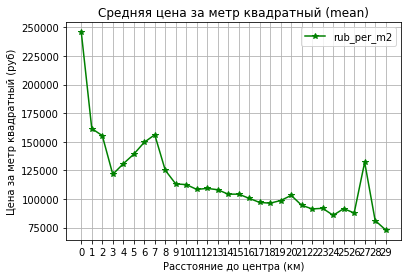

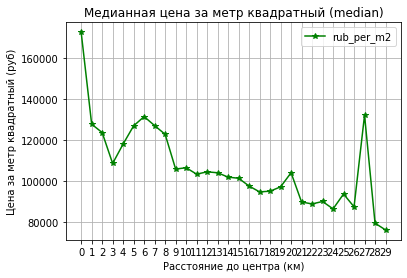

In [162]:
# построим график для среднего (mean)
(estate_spb
     .pivot_table(index='cityCenters_nearest_km', values='rub_per_m2')
     .plot(marker='*', color='green', grid=True)
)

plt.xticks([i for i in range(30)])
plt.title('Средняя цена за метр квадратный (mean)')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Цена за метр квадратный (руб)')
plt.show()

# для сравнения построим график для медианы (median)
(estate_spb
     .pivot_table(index='cityCenters_nearest_km', values='rub_per_m2', aggfunc='median')
     .plot(marker='*', color='green', grid=True)
)
plt.xticks([i for i in range(30)])
plt.title('Медианная цена за метр квадратный (median)')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Цена за метр квадратный (руб)')
plt.show()

- Тренд по среднему и медиане достаточно похож. Значения по среднему **выше**, что объясняется "перетягиванием наверх" из-за выбросов. 

- Видим, что **самая дорогая** недвижимость находится непосредственно **в центре** на **0 км**. **Средняя** цена за один квадратный метр может превышать **200 тыс.рублей**. Далее цены **постепенно падают** до **3 км**.  

- На **6-7 км** происходит снова **скачок цен**. Мы проверили, с чем это может быть связано. На этом расстоянии располагается [много дорогих ЖК](https://evspb.ru/rejting-top-10-samye-dorogie-novostrojki-peterburga/).  

- После этого скачка цены постепенно идут **вниз**. Есть ещё один пик **на 27 км**. Но там всего лишь 2 объявления. 

- Таким образом, в качестве **центрального** сегмента квартир возьмём в т. ч. **дорогие** квартиры, которые располагаются в радиусе **7 км**.

## Шаг 6. Вывод

- Было обнаружено, что **самая дорогая** недвижимость находится непосредственно **в центре** на **0 км**.  
- Далее цены постепенно **снижаются**, но на **7 км** появляется **резкий скачок** цен. Это можно связать с наличием **элитных ЖК** в этом районе.  
- Замечен ещё один скачок цен на **27 км**, но объявлений с таким предложением всего лишь два.  

В качестве **центрального** сегмента квартир были выбраны предложения в радиусе **7 км**.

## Шаг 7. Сравнение центрального и нецентрального сегмента квартир

Для Санкт-Петербурга необходимо проанализировать параметры центральных квартир (площадь, цена, число комнат, высота потолков, дата размещения) и сравнить их с нецентральными районами.

Выделим отдельно квартиры, располагающиеся **до и после 7 км**:

In [163]:
# создание колонки is_center
estate_spb['is_center'] = [value_km <= 7 for value_km in estate_spb['cityCenters_nearest_km']]
estate_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name_changed,rub_per_m2,year_exposition,month_exposition,weekday_exposition,floor_group,living_vs_total,kitchen_vs_total,cityCenters_nearest_km,is_center
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,санкт-петербург,120370.370370,2019,3,3,другой,0.472222,0.231481,16.0,False
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,санкт-петербург,92785.714286,2015,8,3,другой,0.612500,0.148214,14.0,False
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,NaN,9,False,...,санкт-петербург,408176.100629,2015,7,4,другой,NaN,NaN,7.0,True
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,санкт-петербург,100000.000000,2018,6,1,другой,0.320000,0.410000,8.0,False
7,5,7915000.0,71.6,2019-04-18,2,2.75,24,NaN,22,False,...,санкт-петербург,110544.692737,2019,4,3,другой,NaN,0.263966,12.0,False


Анализировать площадь, цену, число комнат, высоту потолков будем в сопоставлении с квартирами из **нецентральныого сегмента**.

### Сопоставление квартир по общей площади (total_area)

In [164]:
# выведем сводную статистику для центра и НЕ центра
np.transpose(estate_spb.groupby('is_center')['total_area'].describe())

is_center,False,True
count,12128.000000,3497.000000
mean,56.414986,91.314023
std,26.718530,53.685597
min,13.000000,12.000000
25%,40.000000,56.700000
50%,50.000000,78.000000
75%,65.600000,109.100000
max,470.300000,495.000000


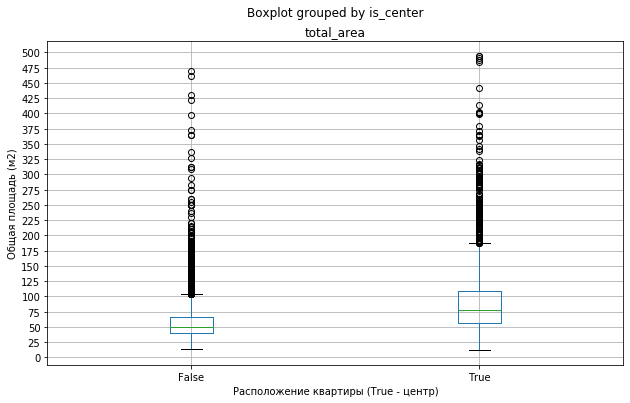

In [165]:
# боксплот для центра и нецентра
describe_box(estate_spb, 'total_area', col_name_by='is_center', figsize=(10, 6), yticks=[i*25 for i in range(21)],
             ylabel='Общая площадь (м2)', xlabel='Расположение квартиры (True - центр)', describe=False)

- В **центре** продаются квартиры с **большей** площадью. Половина всех преложений **в центре от 57 до 109 метров**.
- **Не в центре** половина всех предложений **от 40 до 66 метров**.
- При этом **минимальные** (12 и 13 м2) и **максимальные** (495 и 470 м2) значения для обоих сегментов достаточно похожи.

### Сопоставление квартир по цене (last_price)

In [166]:
# выведем сводную статистику для центра и НЕ центра
np.transpose(estate_spb.groupby('is_center')['last_price'].describe())

is_center,False,True
count,1.212800e+04,3.497000e+03
mean,6.049256e+06,1.394148e+07
std,3.985954e+06,1.609896e+07
min,1.219000e+04,1.600000e+06
25%,3.990000e+06,6.650000e+06
50%,4.990000e+06,9.100000e+06
75%,6.700000e+06,1.410000e+07
max,1.300000e+08,1.908700e+08


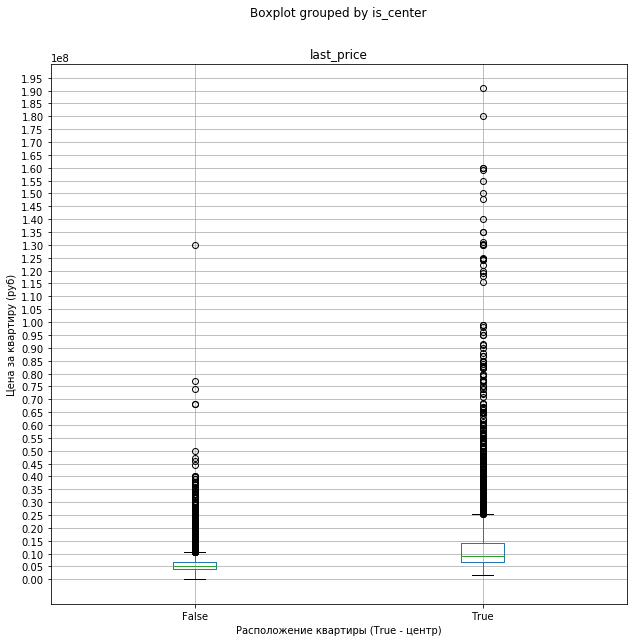

In [167]:
# боксплот для центра и нецентра
describe_box(estate_spb, 'last_price', col_name_by='is_center', figsize=(10, 10), yticks=[i*5000000 for i in range(40)],
             ylabel='Цена за квартиру (руб)', xlabel='Расположение квартиры (True - центр)', describe=False)

- **Средняя цена** для **квартир в центре** также **выше**, чем для нецентральных квартир.
- Привлекает внимание длинный хвост **выбросов** с большими значениями для **центральных** квартир. Это означает, для **центральных** квартир встречается **много дорогих** предложений, цена которых превышает "стандартные".

### Сопоставление квартир по числу комнат (rooms)

In [168]:
# выведем сводную статистику для центра и НЕ центра
np.transpose(estate_spb.groupby('is_center')['rooms'].describe())

is_center,False,True
count,12128.000000,3497.000000
mean,1.978150,2.799828
std,0.950112,1.344737
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,3.000000,3.000000
max,9.000000,9.000000


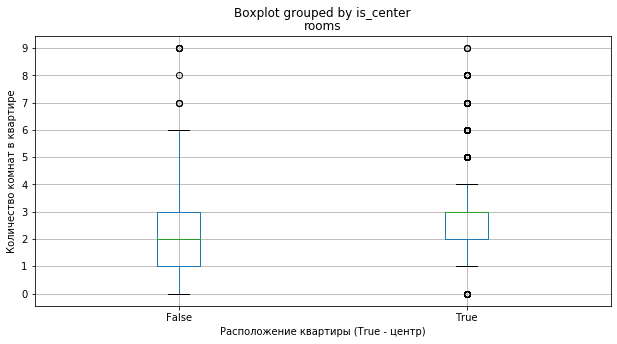

In [169]:
# боксплот для центра и нецентра
describe_box(estate_spb, 'rooms', col_name_by='is_center', figsize=(10, 5), yticks=np.arange(10),
             ylabel='Количество комнат в квартире', xlabel='Расположение квартиры (True - центр)', describe=False)

- В **центре** предлагают в основном **2 и 3** комнатные квартиры.
- **Не в центре** разнообразие по "средним" предложениям больше: **половина** объявлений предлагает **1, 2, 3 комнатные** квартиры.

Ранее мы убрали выдающиеся значения по числу комнат (более 10 комнат). Но есть подозрение, что большинство квартир с 10 комнатами и более попали бы **в центр**. Проверим это на исходных данных:

In [170]:
# количество квартир в центре, более 9 комнат
estate_raw.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 7000 and rooms > 9')['rooms'].value_counts()

11    2
10    2
15    1
19    1
14    1
16    1
Name: rooms, dtype: int64

In [171]:
# количество квартир НЕ в центре, более 9 комнат
estate_raw.query('locality_name == "Санкт-Петербург" and cityCenters_nearest > 7000 and rooms > 9')['rooms'].value_counts()

10    1
14    1
12    1
Name: rooms, dtype: int64

Да, в центре больше предложений с квартирами, где очень большое количество комнат: **от 10 до 16 комнат**.

Посмотрим, как варьируется стоимость квартир с одинаковым количеством комнат для **центра** и **НЕ центра**:

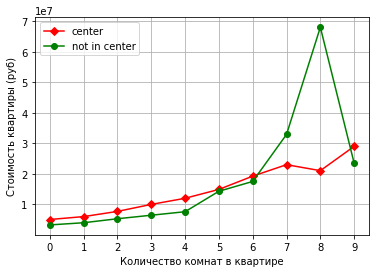

In [172]:
# группировка квартиры центра по комнатам (медиана)
in_center_room = (estate_spb
             .query('is_center == True')
             .pivot_table(index='rooms', values='last_price', aggfunc='median')
             )

# группировка квартиры НЕ центра по комнатам (медиана)
out_center_room = (estate_spb
             .query('is_center == False')
             .pivot_table(index='rooms', values='last_price', aggfunc='median')
             )    
              
plt.plot(in_center_room, color='red', marker='D', label='center')
plt.plot(out_center_room, color='green', marker='o', label='not in center')
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Стоимость квартиры (руб)')
plt.xticks([i for i in range(10)])
plt.grid()
plt.legend()
plt.show()

- С **увеличением** числа комнат постепенно растет и **стоимость** для обоих случаев - центра и нецентра.  
- В среднем **стоимость** квартиры в **центре выше**, чем для **не центра**. Сближение цен наблюдается при **большом количестве комнат** на уровне **5 и 6 комнат**, но **центральные** квартиры всё равно дороже.  
Наблюдается необычный всплеск для **7 и 8 комнат** в **нецентральных** квартирах, но это может быть из-за маленького количества предложений:

In [173]:
# количество объявлений для центра (7 комнат и более)
print('Проверка количества объявлений для центра (7 комнат и более):')
print(estate_spb.query('is_center == True and rooms > 6')['rooms'].value_counts())

print()

# количество объявлений для нецентра (7 комнат и более)
print('Проверка количества объявлений для НЕ центра (7 комнат и более):')
print(estate_spb.query('is_center == False and rooms > 6')['rooms'].value_counts())

Проверка количества объявлений для центра (7 комнат и более):
7    49
8    10
9     3
Name: rooms, dtype: int64

Проверка количества объявлений для НЕ центра (7 комнат и более):
9    5
7    3
8    1
Name: rooms, dtype: int64


Да, так и есть для **нецентра** очень мало объявлений: всего **4 объявления для 7 и 8 комнат**.  

Таким образом, при одинаковом количестве комнат для квартир **в центре** в подавляющем большинстве случаев **стоимость** будет **выше**, чем для квартир **не в центре**. Но стоит помнить, в центре в принципе встречаются чаще **более просторные** квартиры, что также влияет на стоимость.

### Сопоставление квартир по высоте потолков (ceiling_height)

In [174]:
# выведем сводную статистику для центра и НЕ центра
np.transpose(estate_spb.groupby('is_center')['ceiling_height'].describe())

is_center,False,True
count,12128.000000,3497.000000
mean,2.665100,2.968542
std,0.159461,0.345459
min,2.000000,2.400000
25%,2.550000,2.700000
50%,2.650000,3.000000
75%,2.750000,3.120000
max,4.700000,4.900000


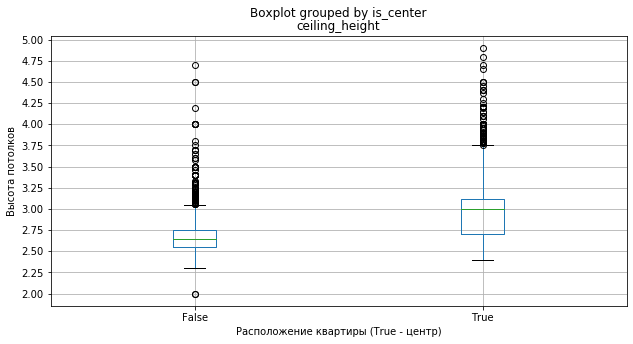

In [175]:
# боксплот для центра и нецентра
describe_box(estate_spb, 'ceiling_height', col_name_by='is_center', figsize=(10, 5), yticks=[i*0.25 for i in range(8, 21)],
             ylabel='Высота потолков', xlabel='Расположение квартиры (True - центр)', describe=False)

- Несмотря на исключение неправдоподобно больших значений **высоты потолков** из датафрейма (ограничение до 5 метров) и замену пропусков **медианой** по этажности, в данных всё равно видна разница в **высоте** потолков между **центром** и **нецентром**.
- В домах, расположенных в **центральной** зоне высота потолков **на уровне 3 метров**, что характерно для **жилья** с классом **выше среднего**.
- Для **нецентральных** квартир высота потолков около **2.65 метров**, что согласуется со средними данными по России.

### Сопоставление квартир по дате размещения объявления

Сгруппируем значения по **году** для **центра** и **НЕ центра** Санкт-Петербурга.

Сделаем **два** типа графиков:
- данные по **центру** и **нецентру** на **одном** графике для сопоставления **стоимости**
- **отдельные** графики для центра и не центра, чтобы отчётливее видеть **тенденцию**

In [176]:
def date_exposition_plot(df_name, col_name_index, xlabel, color, xticks=None, yticks=None):
    """Функция выводит графики для сопоставления стоимости в центре и нецентре:
    - df_name - наименование датафрейма;
    - col_name_index - наименование колонки-индекса;
    - col_name_val - наименования колонки со значениями;
    - xlabel - наименование оси X;
    - ylabel - наименование оси Y;
    - color - цвета графиков."""
    
    # группировка квартиры центра по комнатам (медиана)
    in_center_year = (df_name
                 .query('is_center == True')
                 .pivot_table(index=col_name_index, values='last_price', aggfunc='median')
                 )

    # группировка квартиры НЕ центра по комнатам (медиана)
    out_center_year = (df_name
                 .query('is_center == False')
                 .pivot_table(index=col_name_index, values='last_price', aggfunc='median')
                 )    

    plt.plot(in_center_year, color=color[0], marker='D', label='center')
    plt.plot(out_center_year, color=color[1], marker='o', label='not in center')
    plt.xlabel(xlabel)
    plt.ylabel('Стоимость квартиры (руб)')
    plt.title('Сопоставление цен для центрального и нецентральных районов')
    plt.xticks(xticks)
    plt.yticks(yticks)
    plt.grid()
    plt.legend()
    plt.show()
    
    # отражение данных на разных графиках
    pd.concat([in_center_year, out_center_year], axis=1, join='inner').plot(subplots=True, 
                                                                            color=[color[0], color[1]], grid=True)
    
    plt.xlabel(xlabel)
    plt.grid(True)
    plt.xticks(xticks)
    plt.yticks(yticks)
    plt.show()

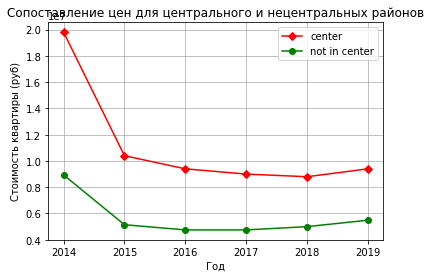

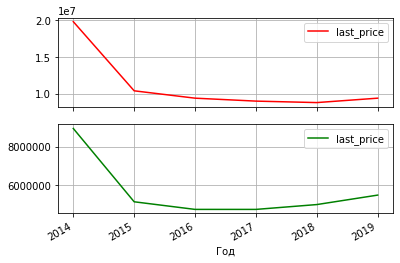

In [177]:
# колонка 'year_exposition'
date_exposition_plot(estate_spb, 'year_exposition', 'Год', ['red', 'green'])

- Снова видим, что стоимость квратиры в пределах 7 километров в целом **дороже**, чем не в центре.  
- По объявлениям видна такая же тенденция, что была обнаружена ранее: в среднем стоимость в **2014** была выше, далее в **2015** она снизилась, а в **2019** снова заметен рост цен.
- Стоит учитывать, что **2014** и **2019** - это **не полные месяца**. 

Сгруппируем значения по **месяцу** для центра и нецентра Санкт-Петербурга:

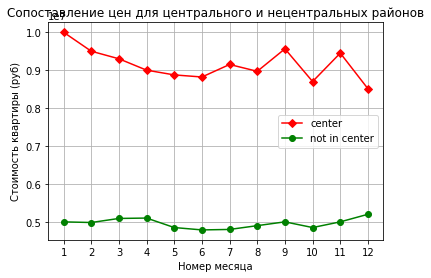

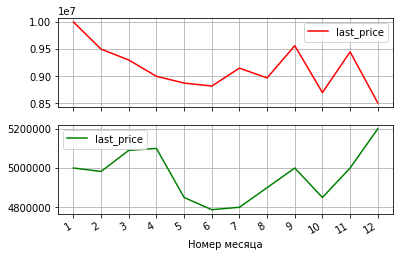

In [178]:
# колонка 'month_exposition'
date_exposition_plot(estate_spb, 'month_exposition', 'Номер месяца', ['red', 'green'], xticks=np.arange(1, 13))

Нельзя сказать, что для **центра** и **нецентра** предложения по месяцам ведут себя одинаково. 

Ранее, рассматривая месяца для **всех локаций сразу** мы отметили, что медиана по **апрелю** несколько выше, чем в среднем и есть небольшое снижение в **июне**. В **декабре** был отмечен самый широкий **размах** по предложениям.

- Для **обоих сегментов** наблюдается **снижение** цен в **июне** (похожая тенденция на графике **всех локаций**).
- По **нецентру** наблюдается рост цен в **апреле** (похожая тенденция на графике **всех локаций**).
- В обоих случаях есть **скачок** средних цен в **сентябре**. Этой особенности **не было** замечено на графике для общего датафрейма.  
Однако это достаточно заметно по **Санкт-Петербургу**. Возможно это связано с тем, что **сезон продаж**, в т. ч. недвижимости, начинается именно **осенью**, когда все выходят из отпусков.
- Для **центра** наблюдается **скачок** цен в **ноябре**, а для **нецентра** - в **декабре**.

Сгруппируем значения по **дню недели** для центра и нецентра Санкт-Петербурга:

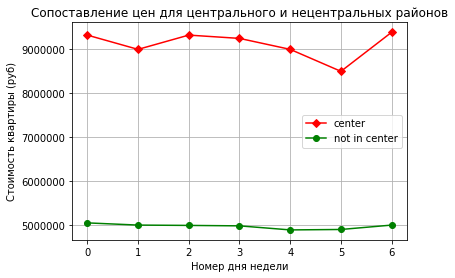

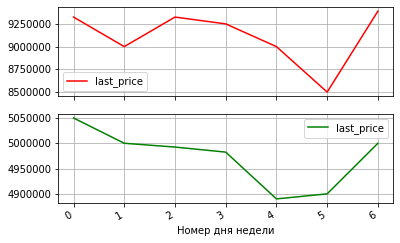

In [179]:
# колонка 'weekday_exposition'
date_exposition_plot(estate_spb, 'weekday_exposition', 'Номер дня недели', ['red', 'green'], xticks=np.arange(7))

- На предыдущем шаге в графике по **всем данным** каких-либо особенностей по **дням недели** не было обнаружено.  
Но здесь мы видим особенности по **Санкт-Петербургу**: получается, что **более дешевые** предложения выставляются в **пятиницу** и **субботу**. И далее **рост** снова наблюдается в **воскресенье**. Было бы интересно проанализировать, связано ли это как-то с настроением людей.

- Если давать рекомендации, когда лучше покупать квартиры, то можно сказать, что лучше покупать квартиру в **пятницу** либо **субботу**, в **июне**, а ещё лучше в **2016** году  🙂

## Шаг 7. Вывод

Рассмотрев **центральные** и **нецентральные** квартиры для **Санкт-Петербурга** мы обнаружили:
- Обычно в **центре** продаются квартиры более **просторные** и **дорогие** квартиры: с **большей площадью**, с более **высокой** ценой и с **большим** количеством **комнат**.
- **Центральные** квартиры имеют **более высокий потолок** (3 метра и более). Высота потолка **нецентральных** квартир имеет стандартный по России размер - на уровне 2.7 метров. 
- При одинаковом количестве **комнат** квартиры в **центре** обычно дороже. Для **нецентральных** квартир наблюдался аномальный скачок для **7 и 8** комнат, но таких объявлений **всего 4** на весь датафрейм.


- По **годам** наблюдается такая же тенденция, как и в общем случае: в **2014** году цены были в среднем **выше**. Далее наблюдается **спад** в **2015**, некоторая стабильность в **2016-2017** и далее постепеный рост. Это справедливо для **центральных** и **нецентральных** квартир.
- По **месяцам** наблюдаются некоторые различия для **центра** и **не центра**. В обоих случаях есть некоторое снижение в **теплые** месяца (май-июль). В обоих случаях наблюдается рост средних цен в **сентябре**. Возможно, это связано со старотом **сезона продаж**. Также для **центра** наблюдается скачок цен в **ноябре**, а для **нецентра** - в **декабре**.

# Итоговый вывод

## Шаг 1. Открытие и изучение файла

- Файл содержал **23699 строки**, т.е. данные по 23699 объявлениям, и **22 колонки** с характеристиками квартиры.

- В некоторых колонках необходимо изменить **тип данных**:
 - Колонка *is_apartment* (апартаменты (булев тип)) необходимо изменить с **object** на **boolean**.
 - Была выделена **группа колонок** со схожей проблемой: тип данных **float**, хотя по смыслу больше подошел бы **integer**.   
 Но все эти колонки содержат **пропуски** - в этом может быть причина типа данных **float**. С другой стороны, проблема может быть и в **дробных числах** - это необходимо будет проверить.

- Была обнаружена проблема, что в колонках с **расстоянием до объектов много пропусков**. Это говорит о том, что по какой-то причине программа, определяющее расстояние, не отработала.
- **Большинство колонок** содержит **пропуски**, причем количество пропущенных значений может достигать **50% и более**.
- **Явных дубликатов** не обнаружено.

## Шаг 2. Предобработка данных

- Во время **предобработки** данных для некоторых **пропусков** была сделана логичная **замена** (например, 0 балконов). В некотрых случаях при малом количестве наблюдений строки **исключались** (например, если отсутствовало название локации). Иногда пропуски можно было заменить **медианой** (высота потолков).
- Для снижения риска в **написании** названий была создана новая колонка *locality_name_changed*, в которой были учтены потенциальные проблемы с буквой "ё", наличием или отсутствие нарицательных слов типа "деревня".
- Дополнительно была рассмотрена взаимосвязь между колонками, описывающими **пространство** квартиры (площадь (общая, кухонная, жилая), количество комнат).

## Шаг 3. Расчёт показателей

- В обработанный датафрейм добавлены требующиеся для выполнения заданий **колонки**:
 - Цена за квадратный метр;
 - День недели, месяц, год публикации объявления;
 - Категоризация этажей: первый, последний, другой;
 - Соотношение жилой и общей площади, площади кухни и общей площади.
 
 
## Шаг 4. Проведение исследовательского анализа данных

На данном этапе необходимо изучить следующие вопросы:
- ***4.1. Распределение параметров: площадь, цена, число комнат, высота потолков***;
 - Были построены графики по площади, цене, числу комнат, высоте потолков:
   - В основном продаются **стандартные** квартиры с метражом **от 30 до 90** метров квадратных.
   - Типичные цены варьируются **от 2 до 7 млн** рублей.
   - Чаще всего продаются квартиры с **1, 2, 3 комнатами**.
   - Чаще всего в предложениях встречаются стандартные потолки **от 2.3 до 2.8 метров**.


- ***4.2. Изучение времени продажи квартиры***;
 - При изучении **времени продаж** по всем данным было обнаружено, что:
   - В среднем квартира продается от **1.5 месяцев до 1 года**.


- ***4.3. Изучение зависимости цены от выбранных параметров***.
 - При изучении **влияния** факторов на продажи обнаружено, что:
   - **Цена** больше всего взаимосвязана с **площадью квартиры**. Количество **комнат** тоже связано с ценой, но в меньшей степени, чем **площадь**.
   - Наблюдается не очень явная, но всё-таки присутствующая **обратная** взаимосвязь между **ценой** и **расстонием до центра**.
   - **Первые** этажи стоят немного **дешевле** других этажей.
   - Из временных наблюдений можно отметить, что в **2014 году** в среднем цена на недвижимость была выше, чем в последующие годы. После небольшого спада в **2015-2016 году** цены снова начинают постепенно райти.
   - В целом квартиры стоят немного **ниже** в **теплое время года**, в частности, в **июне**.
   - Люди **реже** выкладывают объявления в **выходные** и **праздничные месяца** (май, январь).
   

## Шаг 5. Изучение средней цены квадратного метра в топ-10 населённых пунктах
- Проанализировали **топ-10** предложений по продаже:
 - Самые высокие цены в **Санкт-Петербурге**, что можно объяснить статусом города и высоким экономическим уровнем.
 - Последнее место в топ-10 занял **Выборг** - это можно объяснить малой численностью населения, удаленностью от Санкт-Петербурга и окраинным положением.
 - В целом если посмотреть не по топу, а по всем данным, у **курортных** городов тоже достаточно **высокая** стоимость недвижимости. **Самые низкие** цены на недвижимость у **удаленных от центра** и **малочисленных** населенных пунктов. 
 
 
## Шаг 6. Выделение центральной области в Санкт-Петербурге

- Было обнаружено, что **самая дорогая** недвижимость находится непосредственно **в центре** на **0 км**.  
- Далее цены постепенно **снижаются**, но на **7 км** появляется **резкий скачок** цен. Это можно связать с наличием **элитных ЖК** в этом районе.  
- Замечен ещё один скачок цен на **27 км**, но объявлений с таким предложением всего лишь два.  
- В качестве **центрального** сегмента квартир были выбраны предложения в радиусе **7 км**.


## Шаг 7. Сравнение центрального и нецентрального сегмента квартир
- При сопоставлении **центральных** и **нецентральных** квартир Санкт-Петербурга выявлено, что **центральные** квартиры обычно **просторнее** и **дороже** нецентральных, а также имеют более **высокие потолки**.
- Если смотреть на **временные отрезкии** продаж только по **Санкт-Петербургу**, то можно заметить некоторые **особенности**. Так, более отчетливо выделяется **рост** цен в **сентябре**, что можно связать с **открытием сезона продаж**.